# CUSTOMER DATA DICTIONARY DAGO SUPERMARKET

## BACKGROUND
The Dago's Supermarket operates in a highly competitive environment where understanding customer behavior is crucial.  To enhance revenue, customer satisfaction, and operational efficiency, they need to understand customer behavior. They have collected data on customer complaints, offered discounts, recent purchases, and etc. Analyzing this data can provide valuable insights. For instance, understanding the costumer segment can help improve products or services. Evaluating the effectiveness of discounts can inform pricing strategies. Studying the recency of purchases can shed light on customer shopping habits.<br>
In summary, understanding the customer behavior can leverage to gain a competitive edge, meet customer needs more effectively, and ultimately drive business growth.  

## PROBLEM STATEMENT
Based on data from the last 2 years, there has been an increase in recency (Number of days since the customer's last purchase). It is feared that this increase will have the impact of decreasing customers. Marketing experiments such as discount vouchers have been carried out, but the use of vouchers is still small. So further analysis is needed regarding marketing strategies and their distribution.<br>
There are several problems that want to be analyze here:
1. Customer Engagement: Dago's Supermarket want to increase customer engagement and build stronger relationships with its customers.
2. Purchasing Patterns: Dago's Supermarket want to identify common purchasing patterns or trends among its customers to optimize product placement, inventory management, and sales strategies.
3. Promotional Campaigns: Dago's Supermarket want to optimize effectiveness of supermarket's promotional campaigns and can the supermarket tailor these campaigns to individual customer preferences to increase their effectiveness.

## GOALS
1. Understand Shopping Preferences: Analyze why customers prefer in-store shopping and how to enhance their online and catalog shopping experience.
2. Boost Sales: Identify strategies to increase the sales of other product categories that currently have lower purchasing rates.
3. Improve Customer Retention: Understand why customers are taking longer to make repeat purchases and how to encourage them to shop more frequently.
4. Address Customer Complaints: Analyze the nature of customer complaints and address them to improve customer satisfaction.
5. Evaluate Discount Strategy: Assess the effectiveness of the discount strategy in driving sales and customer satisfaction.

## BUSINESS QUESTION
Q1. What are the different segments of customers that shop at the supermarket?
1. Customer Segmentation based on Age Classification
2. Customer Segmentation based on Education

Q2. Which products are often bought together and best-seller?
1. Best-Seller products
2. Products are often bought together

Q3. Why do customers prefer in-store shopping and how can their online and catalog shopping experience be enhanced?
1. Percentage of Buying Method Purchases Made by Customers
2. Total Purchases of Products per Category Based on Age Classification and Method of Buying

Q4: How effective is the discount strategy in driving sales and customer satisfaction?
1. Checking Customer Who Applied Campaign
2. The Number of Discounts Applied for Each campaign and age classification
3. The Number of Discounts Applied for Each campaign and Education

Q5. What strategies could we implement to encourage repeat purchases and improve customer loyalty?
1. Cumulative Recency Over Time
2. The Number of Customers who Complained

## 1. DATA UNDERSTANDING

### 1.1. Import necessary Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

### 1.2. Load the Data into Pandas Dataframe

*Dataset Source :https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK*

In [8]:
df = pd.read_csv('Supermarket Customers.csv')

#View first and last 5 rows of dataframe
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


This dataset contains the characteristics of customers in supermarket ABCD. To make this dataset clear, we group the coloumn on 5: <br>
1. PEOPLE<br>
* `ID`: Customer's unique identifier<br>
* `Year_Birth` : Customer's birth year<br>
* `Education`: Customer's education level<br>
* `Marital_Status`: Customer's marital status<br>
* `Income`: Customer's yearly household income<br>
* `Kidhome`: Number of children in customer's household<br>
* `Teenhome`: Number of teenagers in customer's household<br>
* `Dt_Customer`: Date of customer's enrollment with the company<br>
* `Recency`: Number of days since customer's last purchase<br>
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise<br><br>

2. PRODUCTS<br>
* `MntWines`: Amount spent on wine in last 2 years<br>
* `MntFruits`: Amount spent on fruits in last 2 years<br>
* `MntMeatProducts`: Amount spent on meat in last 2 years<br>
* `MntFishProducts`: Amount spent on fish in last 2 years<br>
* `MntSweetProducts`: Amount spent on sweets in last 2 years<br>
* `MntGoldProds`: Amount spent on gold in last 2 years<br><br>

3. PROMOTION<br>
* `NumDealsPurchases`: Number of purchases made with a discount<br>
* `AcceptedCmp1`: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise<br>
* `AcceptedCmp2`: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise<br>
* `AcceptedCmp3`: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise<br>
* `AcceptedCmp4`: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise<br>
* `AcceptedCmp5`: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise<br>
* `Response`: 1 if the customer accepted the offer in the last campaign, 0 otherwise<br><br>

4. PLACE<br>
* `NumWebPurchases`: Number of purchases made through the company’s website<br>
* `NumCatalogPurchases`: Number of purchases made using a catalog<br>
* `NumStorePurchases`: Number of purchases made directly in stores<br>
* `NumWebVisitsMonth`: Number of visits to the company’s website in the last month

## 2. DATA WRANGLING

### 2.1. Data Information

In [10]:
print(f'The number of rows and columns in the df dataset are {df.shape}')
df.info()

The number of rows and columns in the df dataset are (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         224

Based on the information above, it can be seen that in total there are 2240 rows and 29 columns in the dataframe that we want to analyze. Each column has a different data type. The things that concern us are:
1. There is a missing value in the `Income` column
2. The data type in the `Dt_Customer` column is an object
3. Columns that we dont need to carry out further analysis

### 2.2. Handling Missing Value

In [16]:
print("The percentage of each column's missing values:")
print(df.isna().sum()/df.shape[0]*100)
print('\nNumber of missing values from all columns: ', df.isna().sum().sum())

The percentage of each column's missing values:
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Number o

There are 24 missing values in the `Income` column of the df dataset, which represents 1.07% of the total values in that column. To handle missing values, there are several options available, including dropping rows or columns of missing values, imputing missing values with the mean, median, mode, or a constant value, or using advanced methods such as regression, interpolation, or machine learning algorithms. The choice of method depends on the specific context and goals of the analysis.<br>
Given that the percentage of missing values is only 1.07% (<10%), we may use pandas' drop() function to exclude rows that contain missing values.

In [17]:
df.drop(df[df['Income'].isna()].index, inplace=True)

After dropping the missing value from the income, we could check the dataset now. And the missing value have been remove.

In [18]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### 2.3. Handling Duplicate Data & Data Types 

In [20]:
print('The number of duplicate data in this dataset are:')
df.duplicated().sum()

The number of duplicate data in this dataset are:


0

From the df.info() function indicates that the `Dt_Customers` column has an object data type, suggesting it may contain strings or mixed types of data. To convert it to a datetime format, I use the pd.to_datetime function. This will ensure that the `Dt_Customers` column is specifically interpreted as dates and times, allowing for time series-based operations and analysis. By specifying the correct format of %d-%m-%Y.

In [21]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [22]:
# Checking Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

### 2.4. Show unique values in each column

In [25]:
print('Number of unique values in each column:')
df.nunique()

Number of unique values in each column:


ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

There are some columns which are either redundant or irrelevant to the analysis: The `Z_CostContact` and `Z_Revenue` columns should be removed since they have constant values and offer no insightful data for the analysis. Stated differently, these columns can be securely eliminated since they won't add to any patterns or variations in the data.

In [ ]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

The `Z_CostContact` and `Z_Revenue` columns already dropped. The unique values of each column will be checked again.

In [29]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for i in df.columns :
    if i == 'Dt_Customer' :
        listItem.append( [i, df[i].nunique(), df[i].apply(lambda i : i.date()).unique()])
    else :
        listItem.append( [i, df[i].nunique(), df[i].unique()])



dfUnique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
dfUnique

,Column Name,Number of Unique,Unique Sample
0,ID,2216,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 2139, 1371, 9909, 7286, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 11178, 2230, 7516, 7247, 11100, 4646, 3037, 1473, 1016, 4518, 9370, 8908, 8373, 7533, 2683, 3629, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953, 1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,662,"[2012-09-04, 2014-03-08, 2013-08-21, 2014-02-10, 2014-01-19, 2013-09-09, 2012-11-13, 2013-05-08, 2013-06-06, 2014-03-13, 2013-11-15, 2012-10-10, 2012-11-24, 2012-12-24, 2012-08-31, 2013-03-28, 2012-11-03, 2012-08-08, 2013-01-06, 2012-12-23, 2014-01-11, 2013-03-18, 2013-01-02, 2013-05-27, 2013-05-31, 2013-11-22, 2014-05-22, 2013-05-11, 2012-10-29, 2013-02-20, 2013-08-29, 2013-12-31, 2013-09-02, 2014-02-11, 2013-02-01, 2013-04-29, 2013-03-12, 2013-10-02, 2014-06-28, 2012-11-09, 2013-05-24, 2012-11-08, 2014-05-12, 2012-08-11, 2014-06-07, 2013-06-12, 2012-11-19, 2013-04-02, 2014-04-28, 2014-03-03, 2013-07-04, 2012-09-07, 2013-02-18, 2013-06-11, 2013-12-06, 2013-05-21, 2014-05-11, 2014-03-19, 2013-09-27, 2013-04-08, 2012-09-11, 2013-03-17, 2013-04-05, 2014-04-30, 2012-12-19, 2012-08-27, 2012-10-12, 2013-09-04, 2012-08-29, 2013-06-23, 2013-07-03, 2014-02-25, 2013-08-11, 2013-07-16, 2014-05-28, 2014-01-21, 2014-03-23, 2014-05-24, 2012-11-22, 2013-04-11, 2013-12-01, 2013-06-20, 2013-07-23, 2014-03-30, 2013-04-20, 2013-05-17, 2014-05-08, 2013-12-10, 2013-09-24, 2013-02-02, 2012-12-07, 2013-11-02, 2012-11-10, 2014-06-25, 2012-12-12, 2013-09-10, 2014-01-24, 2013-02-19, 2013-07-11, 2013-11-14, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 40, 9, 87, 5, 95, 48, 70, 79, 84, 44, 43, 35, 15, 17, 46, 27, 25, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 80, 45, 14, 52, 93, 50, 60, 11, 66, 97, 62, 6, 33, 22, 71, 67, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 123, 826, 245, 650, 12, 510, 328, 984,

There are 5 distinct values in the `Education` column: [Graduation, Master, PhD, Basic, and 2n cycle]. The 2n Cycle value as known as Master Degree can be regarded as Master to facilitate data interpretation.

In [34]:
df[df['Education']=='2n Cycle']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
19,2278,1985,2n Cycle,Single,33812.0,1,0,2012-11-03,86,4,...,1,3,6,0,0,0,0,0,0,0
37,10755,1976,2n Cycle,Married,23718.0,1,0,2013-09-02,76,6,...,1,2,7,0,0,0,0,0,0,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,1,3,9,0,0,0,0,0,0,1
67,9369,1979,2n Cycle,Single,88194.0,0,1,2014-03-19,19,688,...,10,10,5,1,0,0,1,0,0,1
78,10401,1976,2n Cycle,Together,26326.0,0,0,2013-09-04,12,1,...,0,3,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,8207,1957,2n Cycle,Married,53233.0,0,1,2014-03-18,18,28,...,0,3,4,0,0,0,0,0,0,0
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,...,7,10,3,1,0,0,1,0,0,1
2210,607,1955,2n Cycle,Divorced,41769.0,0,1,2013-02-13,31,302,...,1,7,8,0,0,0,0,0,0,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,6,8,2,0,0,0,0,0,0,0


In [35]:
# Replacing '2n Cycle' values to 'Master' values
df.Education = df.Education.replace({'2n Cycle' : 'Master'})

### 2.5. Show Descriptive Statistics Data

In [38]:
# Show dataframe Descriptive Statistics
display(df.describe().T, df.describe(include='object').T)

,count,mean,min,25%,50%,75%,max,std
ID,2216.0,5588.353339,0.0,2814.75,5458.5,8421.75,11191.0,3249.376275
Year_Birth,2216.0,1968.820397,1893.0,1959.0,1970.0,1977.0,1996.0,11.985554
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2216.0,0.441787,0.0,0.0,0.0,1.0,2.0,0.536896
Teenhome,2216.0,0.505415,0.0,0.0,0.0,1.0,2.0,0.544181
Dt_Customer,2216,2013-07-10 11:29:27.509025280,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-31 00:00:00,2014-06-29 00:00:00,NaN
Recency,2216.0,49.012635,0.0,24.0,49.0,74.0,99.0,28.948352
MntWines,2216.0,305.091606,0.0,24.0,174.5,505.0,1493.0,337.32792
MntFruits,2216.0,26.356047,0.0,2.0,8.0,33.0,199.0,39.793917
MntMeatProducts,2216.0,166.995939,0.0,16.0,68.0,232.25,1725.0,224.283273


,count,unique,top,freq
Education,2216,4,Graduation,1116
Marital_Status,2216,8,Married,857


### 2.6. Addition of New Column

A new column will be added which will be useful to help analyze the problem to be answered. The column to be added are the `Age` & `Age_group` column. This field is a helpful feature for determining the customer's age.
This column is obtained from the subtraction results from 2014 minus the Year_Birth column. 2014 was selected because the dataset includes customer purchases made throughout the 2012–2014 period, with 2014 being the maximum value in the Dt_Customers column.

In [40]:
df['Age'] = 2014 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,33


The World Health Organization under the United Nations officially revised the age standards. According to the new age classification, the childhood period is from 1 to 13, period of youth is from 13 to 24, initial period of maturnity is from 25 to 36, middle period of maturnity is 37-48, period of full maturnity  is  49-60, presenile  period  is  61-72, senile period is 73-84, eldery is >85. 
(https://journals.scholarpublishing.org/index.php/ASSRJ/article/view/2924.)<br>
Since our min value `Age` is 18, we start analyze from period of youth (13-24).

In [49]:
def agerange (int) :
    if int <= 24 :
        return 'Period of Youth'
    elif 24 < int <= 36 :
        return 'Initial Maturnity'
    elif 36 < int <= 48 :
        return 'Middle Maturnity'
    elif 48 < int <= 60 :
        return 'Full Maturnity'
    elif 60 < int <= 72 :
        return 'Presenile Period'
    elif 72 < int <= 84 :
        return 'Senile Period' 
    else :
        return 'Eldery'

In [50]:
df['Age_Classification'] = df['Age'].apply(agerange)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Classification
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,57,Full Maturnity
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,60,Full Maturnity
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,49,Full Maturnity
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,30,Initial Maturnity
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,33,Initial Maturnity


You might include in the analysis a `TotalSpent` column that lists all of the products that customers have purchased. This will give a fuller view of what customers are buying and can aid in figuring out their preferences and buying trends. You may observe the relationship between a customer's total expenditure and other variables, such age, income, and the kinds of things they have bought, by entering this column.

In [94]:
df['Total_Spent_Product'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

### 2.7. Descriptive Statistics

In [96]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2216.0,5588.353339,0.0,2814.75,5458.5,8421.75,11191.0,3249.376275
Year_Birth,2216.0,1968.820397,1893.0,1959.0,1970.0,1977.0,1996.0,11.985554
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2216.0,0.441787,0.0,0.0,0.0,1.0,2.0,0.536896
Teenhome,2216.0,0.505415,0.0,0.0,0.0,1.0,2.0,0.544181
Dt_Customer,2216,2013-07-10 11:29:27.509025280,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-31 00:00:00,2014-06-29 00:00:00,NaN
Recency,2216.0,49.012635,0.0,24.0,49.0,74.0,99.0,28.948352
MntWines,2216.0,305.091606,0.0,24.0,174.5,505.0,1493.0,337.32792
MntFruits,2216.0,26.356047,0.0,2.0,8.0,33.0,199.0,39.793917
MntMeatProducts,2216.0,166.995939,0.0,16.0,68.0,232.25,1725.0,224.283273


Based on the descriptive statistical analysis above, we can see a general description of the data distribution in each column:
* `Income`: the average customer income is 52247, where the std is quite wide at 25173. This shows that there is an imbalance between the income of each customer. This can be seen with the minimum value = 1730 and maximum = 666666.
* `Age`:The oldest customer is 121 years old, and the youngest is 18 years old. The average customer is 45 years old. Given the similarity of the mean and median values, it can be concluded that the age distribution in this dataset is quite even.
* The largest average number of product purchases was Wines at 305 and the largest product purchased was Meat at 1725.
* `NumWebPurchases`: Number of purchases made through the company's website has a mean of 4.08
* `NumCatalogPurchases`: Number of purchases made using a catalog having mean 2.67
* `NumStorePurchases`: Number of purchases made directly in stores having mean 5.8
* `NumWebVisitsMonth`: Number of visits to the company's website in the last month around 5 times per month, but there are very active customers with up to 20 visits.

### 2.8. Outlier Identification

Outlier is a data point that is significantly different from other data points in a dataset. Outliers can be caused by measurement or execution errors, or they can occur naturally through variability. Outliers can have a big impact on statistical analysis and machine learning because they can skew hypothesis tests. There are several methods for identifying outliers, including the interquartile range (IQR) method, which calculates the outlier data points as the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. Outliers can be removed from a dataset using the same process as removing a data item from a pandas data frame.<br>
Outliers can also affect the results of A/B tests and other experiments, leading to incorrect conclusions. However, outliers can also contain valuable information, so it is important to investigate them and determine whether they should be removed or kept in the dataset. There are several methods for detecting and handling outliers, including the interquartile range (IQR) method and winsorizing techniques.

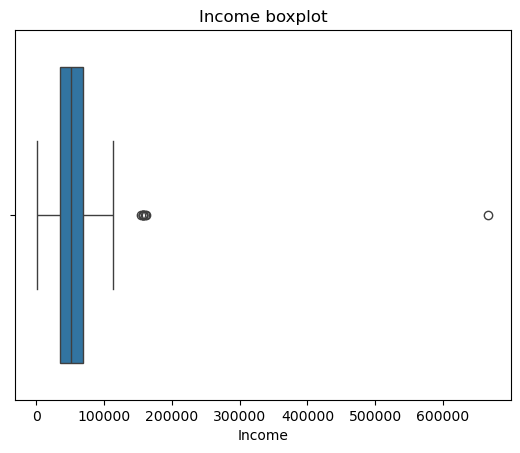

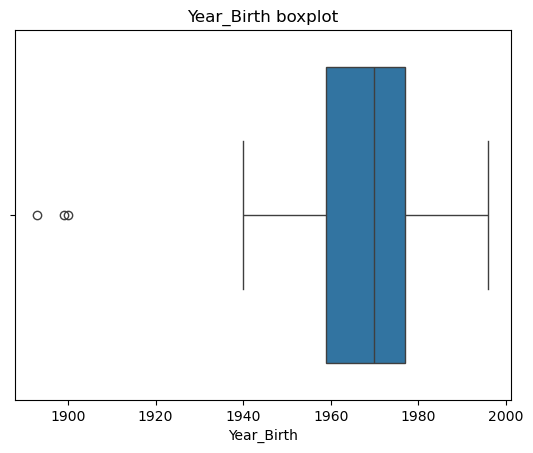

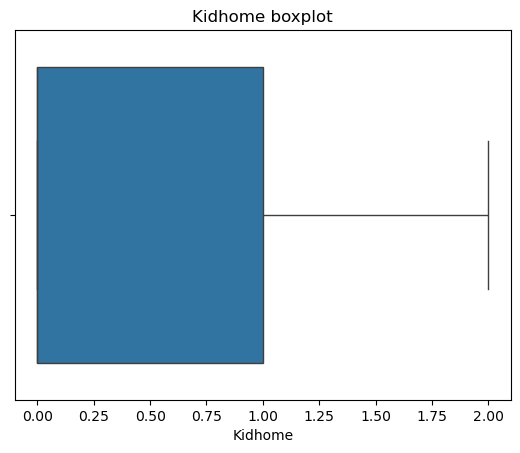

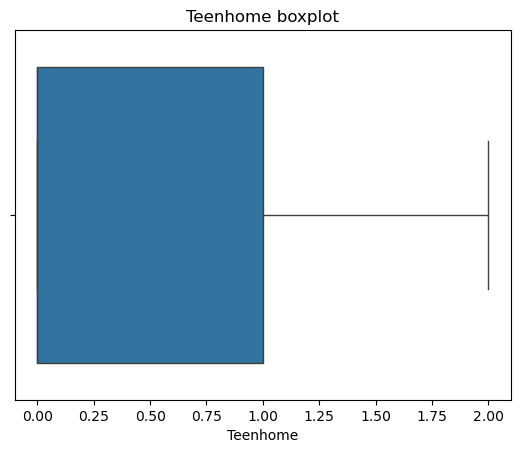

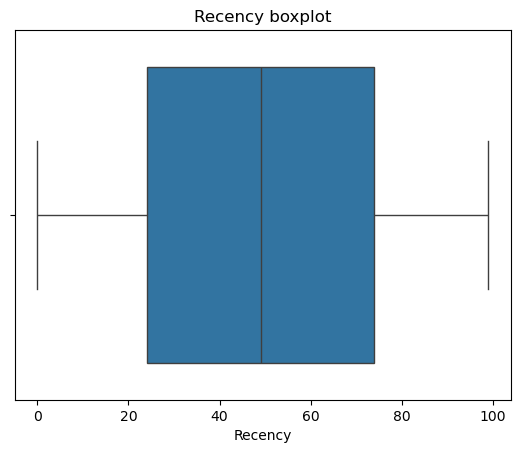

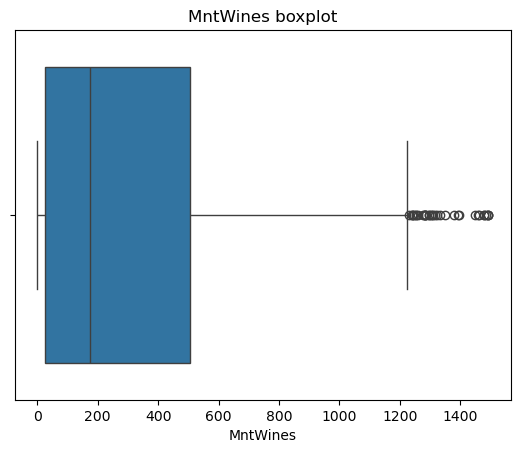

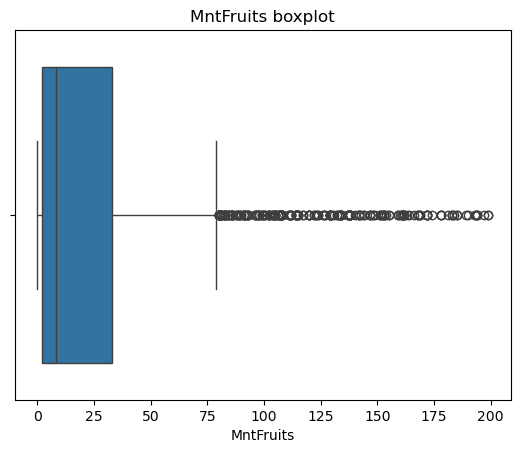

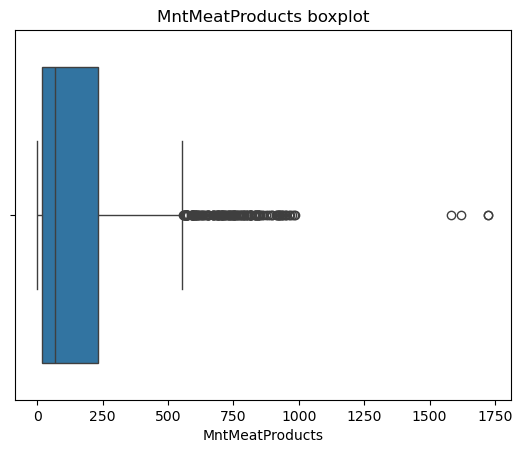

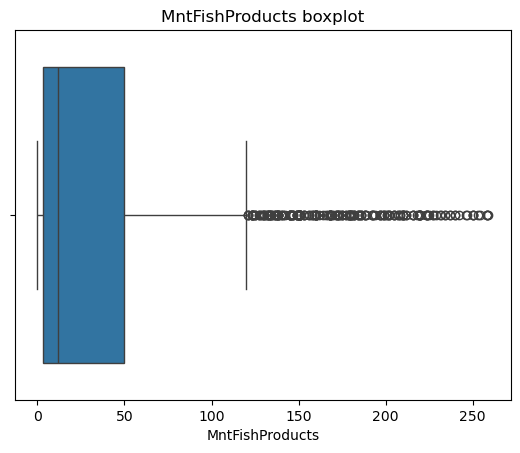

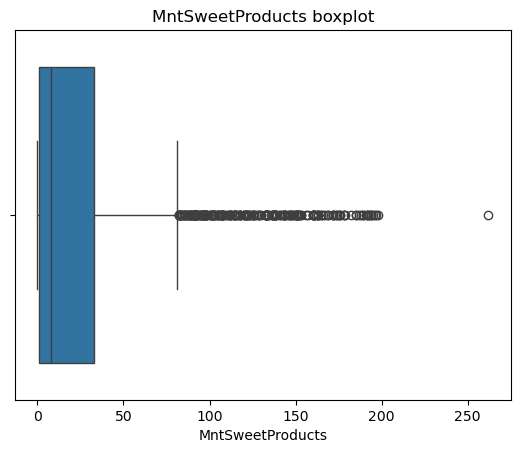

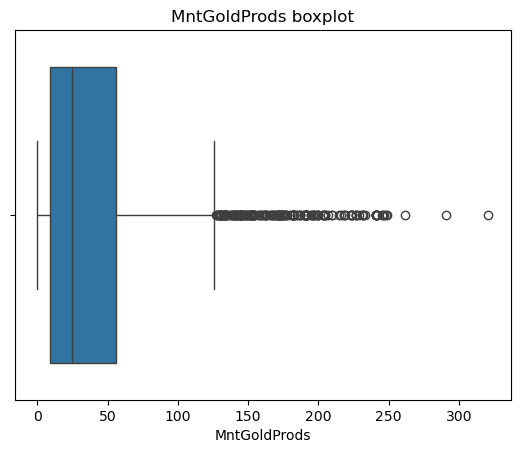

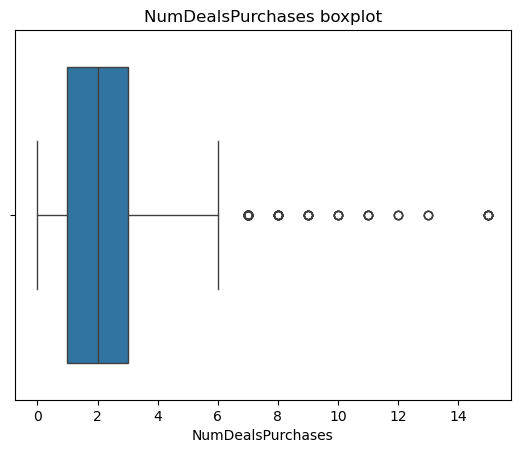

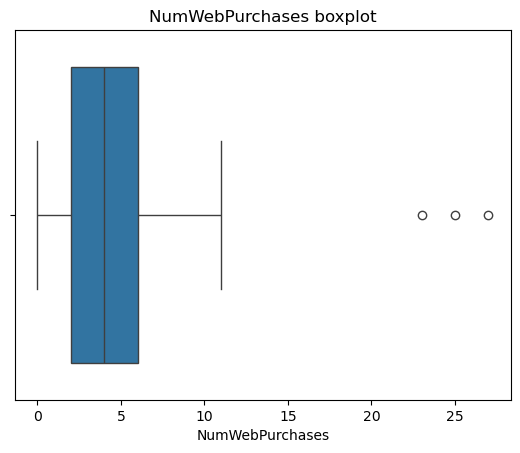

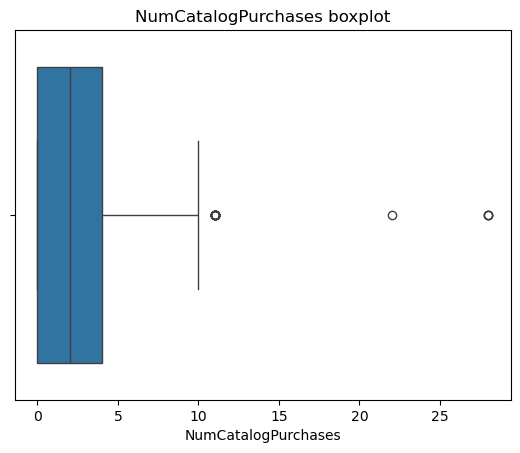

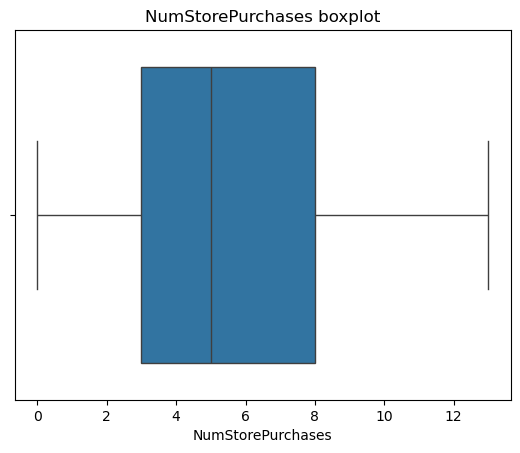

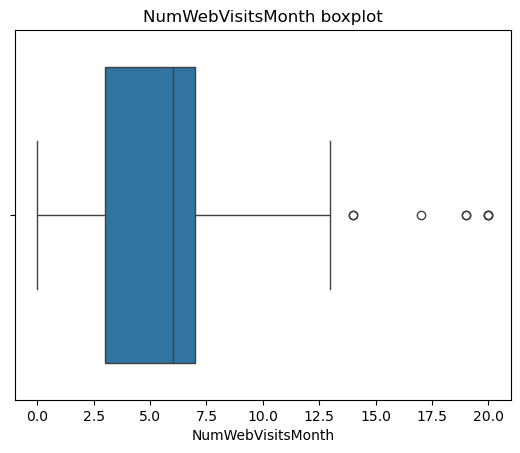

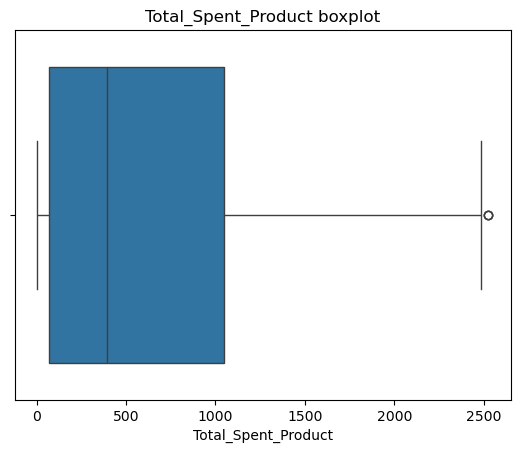

In [97]:
# Outlier Checking
columns = ['Income','Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
           'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Total_Spent_Product']
for column in columns:
    sns.boxplot(df[column], orient='h')
    plt.title(f"{column} boxplot")
    plt.show()

In [98]:
# Outlier Checking Function
def Cek_Outliers(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    Upper_fence = Q3 + (1.5 * IQR)
    Lower_fence = Q1 - (1.5 * IQR)
    df_outliers = df[(df[col] < Lower_fence) | (df[col] > Upper_fence)]
    if len(df_outliers) == 0:
        return "No Outliers"
    else:
        return df_outliers

In [99]:
# Outlier Checking for Income Column
df_outliers = Cek_Outliers(df, 'Income')
df_outliers.T

,164,617,655,687,1300,1653,2132,2233
ID,8475,1503,5555,1501,5336,4931,11181,9432
Year_Birth,1973,1976,1975,1982,1971,1977,1949,1977
Education,PhD,PhD,Graduation,PhD,Master,Graduation,PhD,Graduation
Marital_Status,Married,Together,Divorced,Married,Together,Together,Married,Together
Income,157243.0,162397.0,153924.0,160803.0,157733.0,157146.0,156924.0,666666.0
Kidhome,0,1,0,0,1,0,0,1
Teenhome,1,1,0,0,0,0,0,0
Dt_Customer,2014-03-01 00:00:00,2013-06-03 00:00:00,2014-02-07 00:00:00,2012-08-04 00:00:00,2013-06-04 00:00:00,2013-04-29 00:00:00,2013-08-29 00:00:00,2013-06-02 00:00:00
Recency,98,31,81,21,37,13,85,23
MntWines,20,85,1,55,39,1,2,9


Using boxplots and descriptive statistics, the outlier analysis revealed numerous values that are higher than the `Income` column's upper fence (118350.5). Seven of them have an income around 155000, while one has an income of 666666. The notable distinction between the mean and median values (52247 and 51381), respectively, suggests that outliers have an impact on them. The presence of outliers that affect the mean is indicated by the relatively substantial discrepancy between the mean and median.<br>
Outliers in the boxplot are identified by points that are not within the whisker line. Outliers may point to anomalies in the data or anomalous occurrences. The number 666666 in this instance might be an anomaly that merits attention. 

In [109]:
df.drop(2233, inplace=True)

The 2233 row have been deleted due to anomaly affected. Other data is still stored as the number of products purchased by the customer indicates that the customer purchased it for the purpose of opening a restaurant or catering

## 3. DATA ANALYSIS

### 3.1. DATA DISTRIBUTION

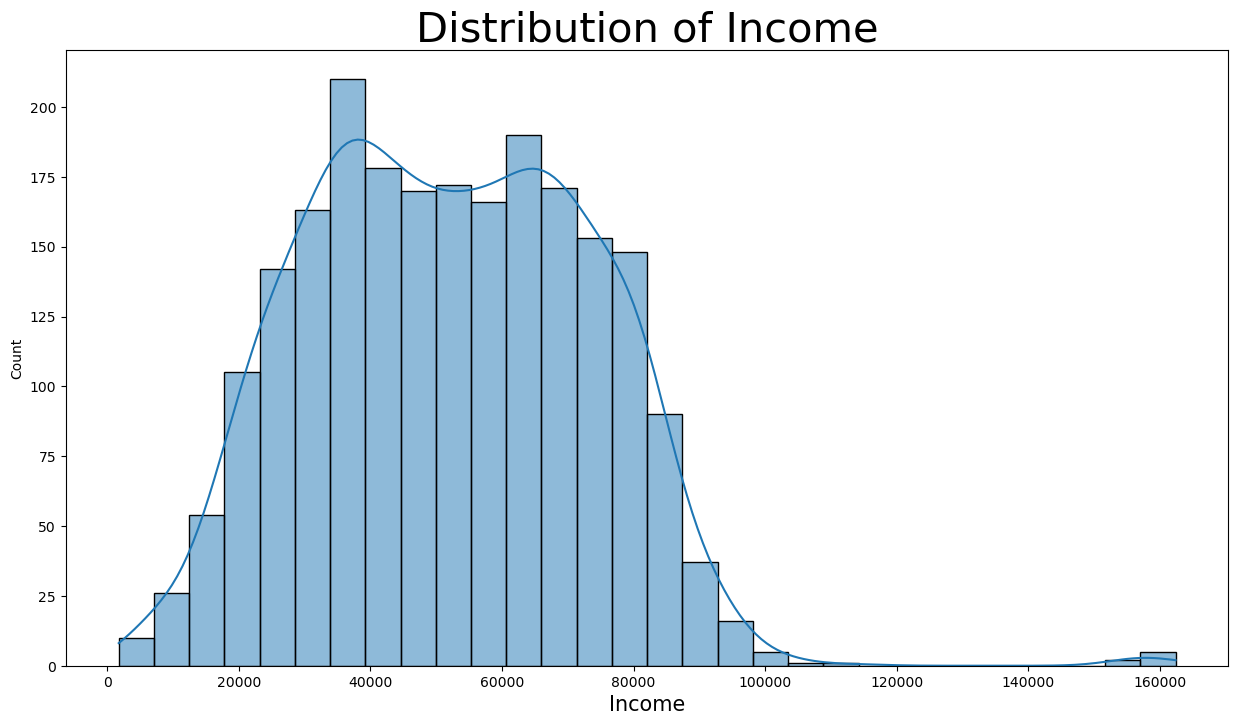

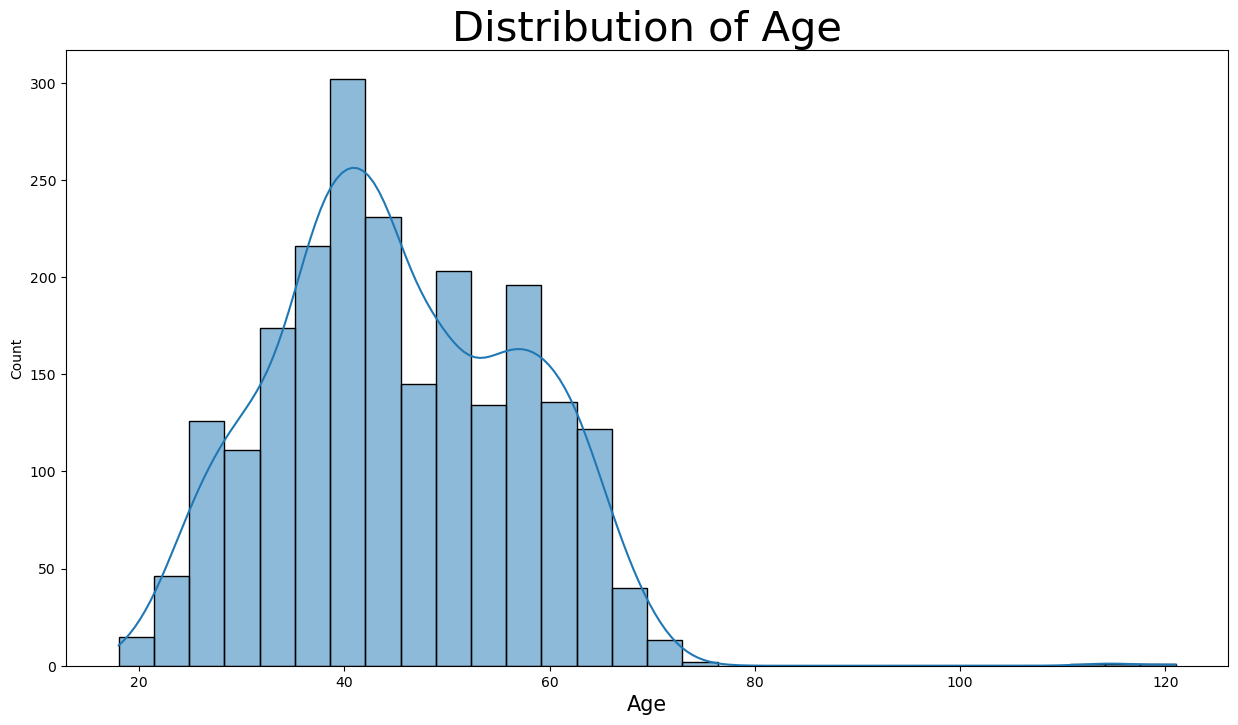

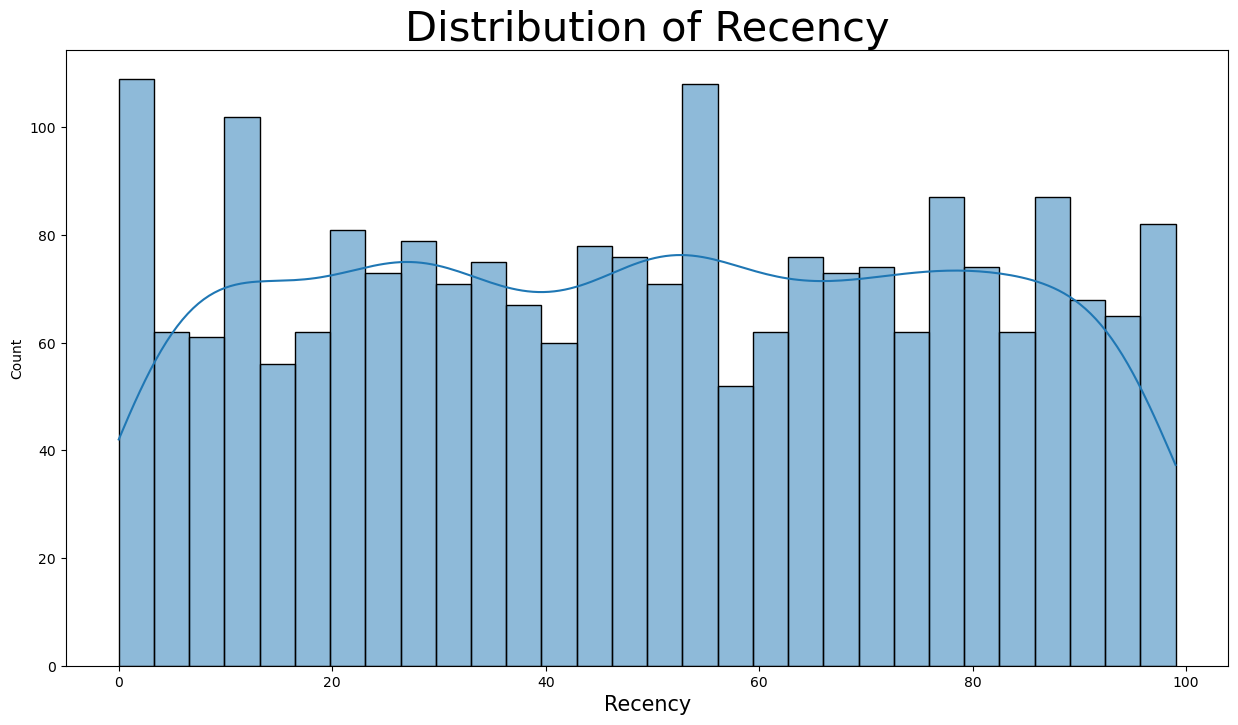

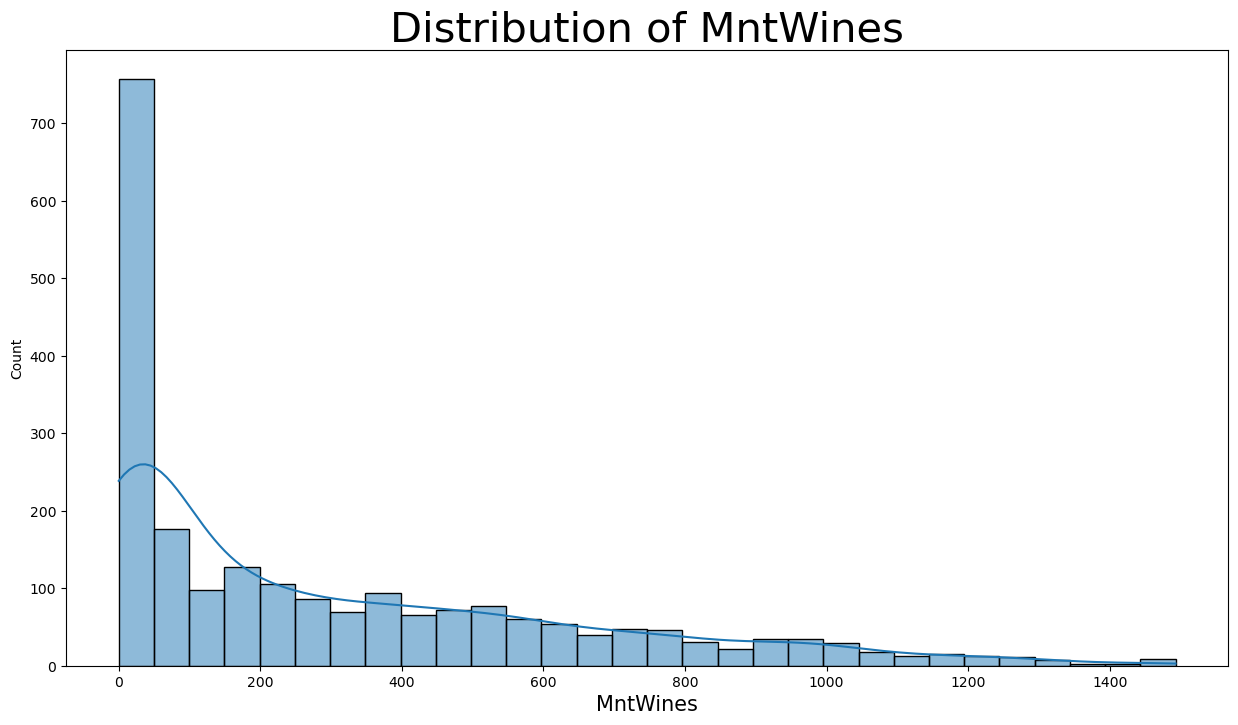

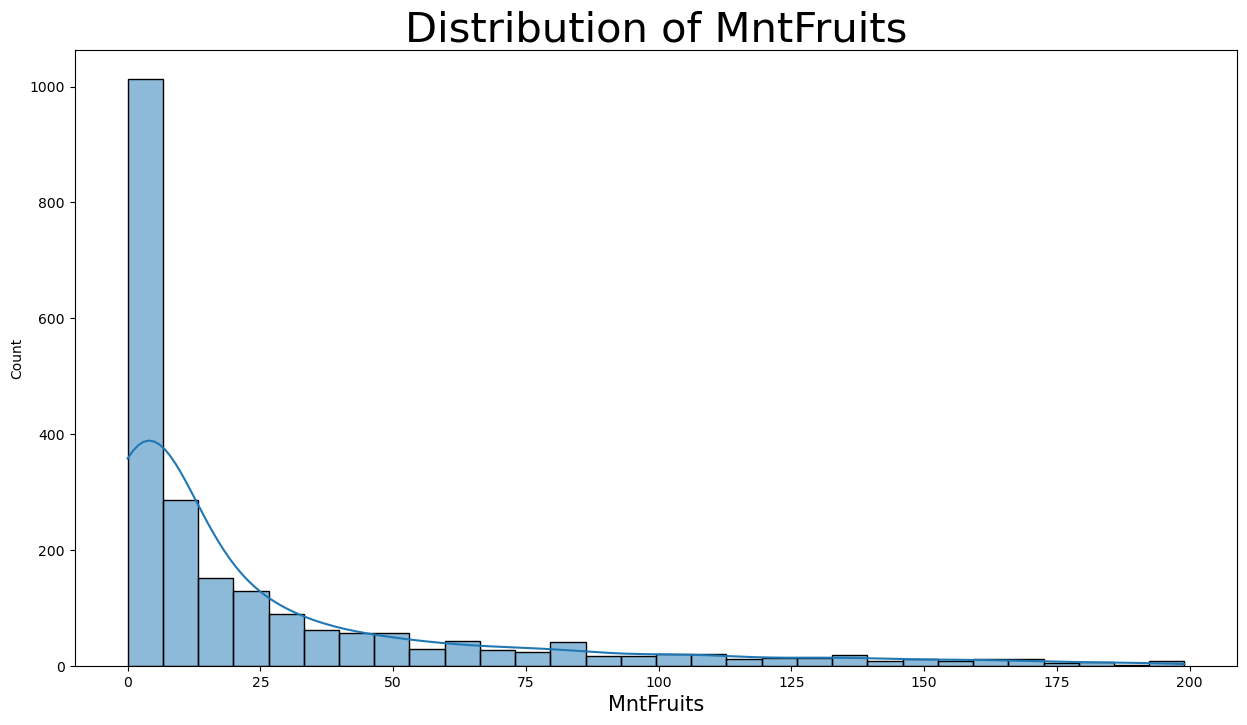

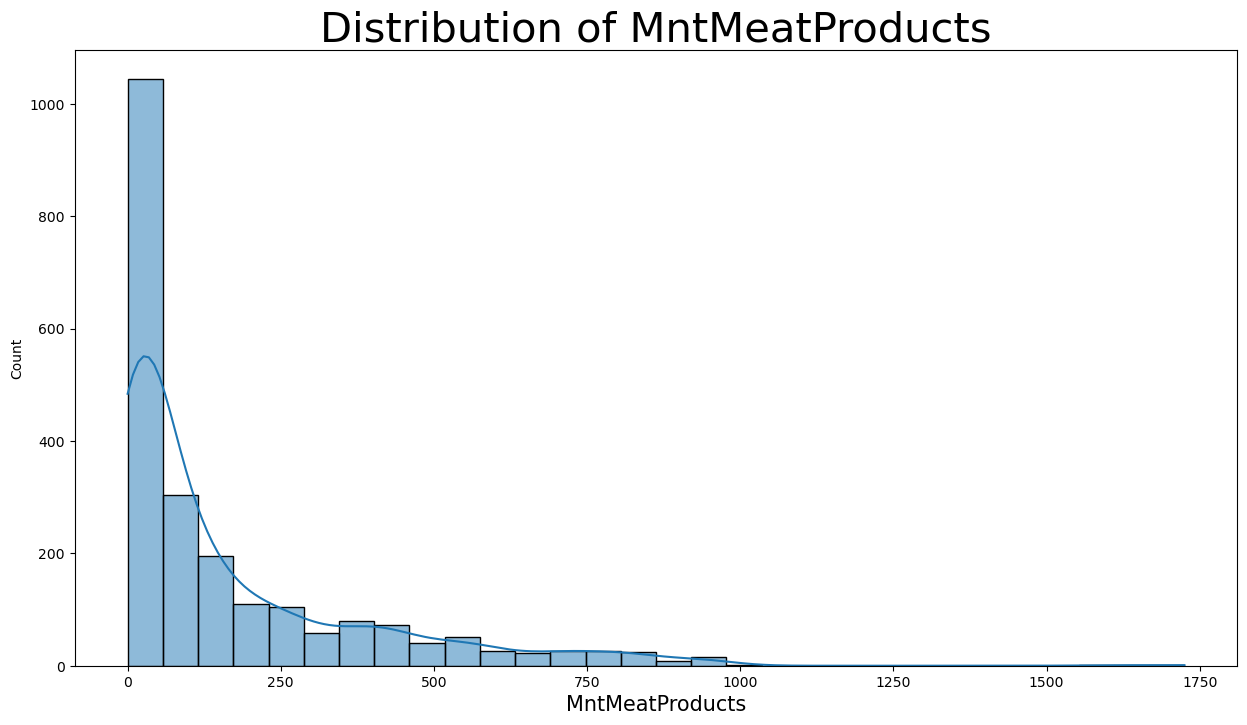

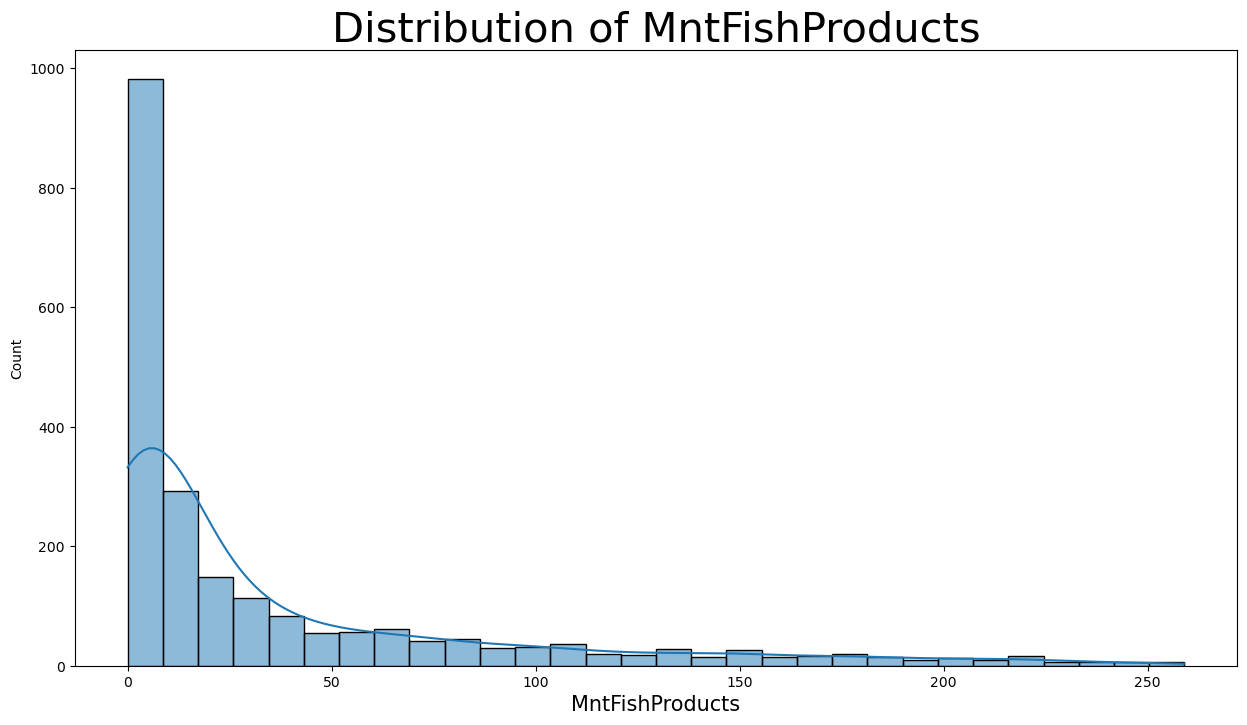

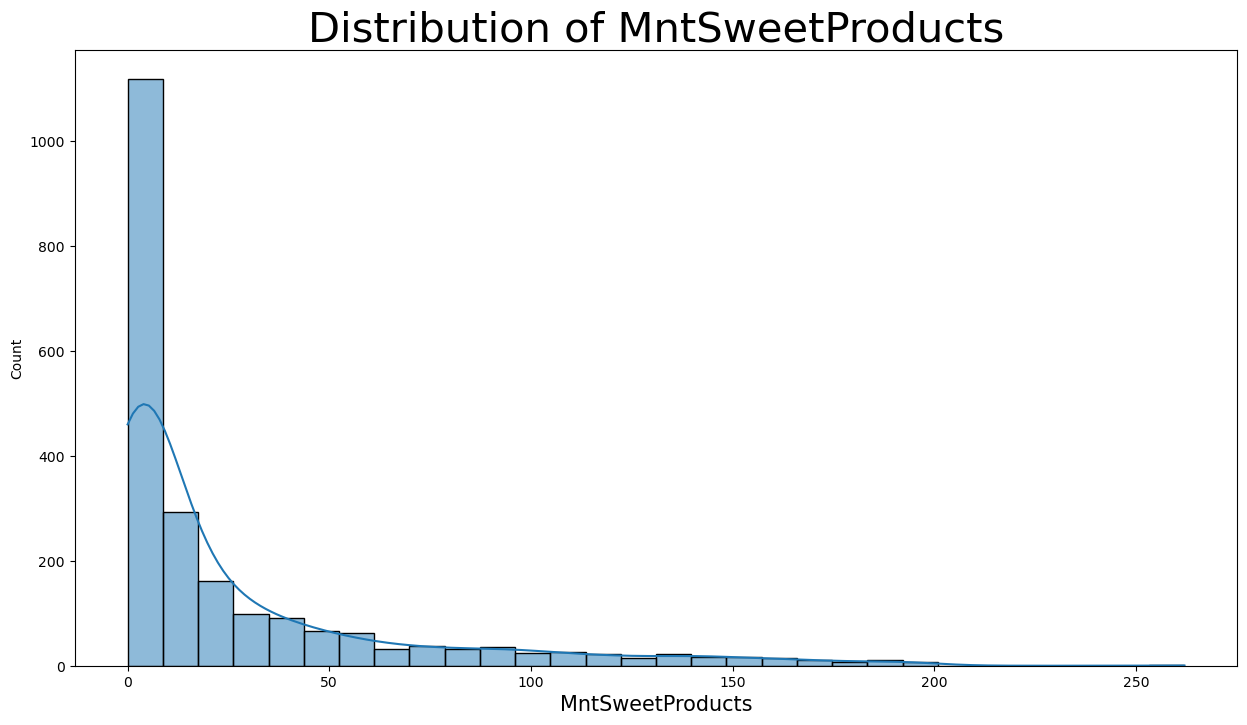

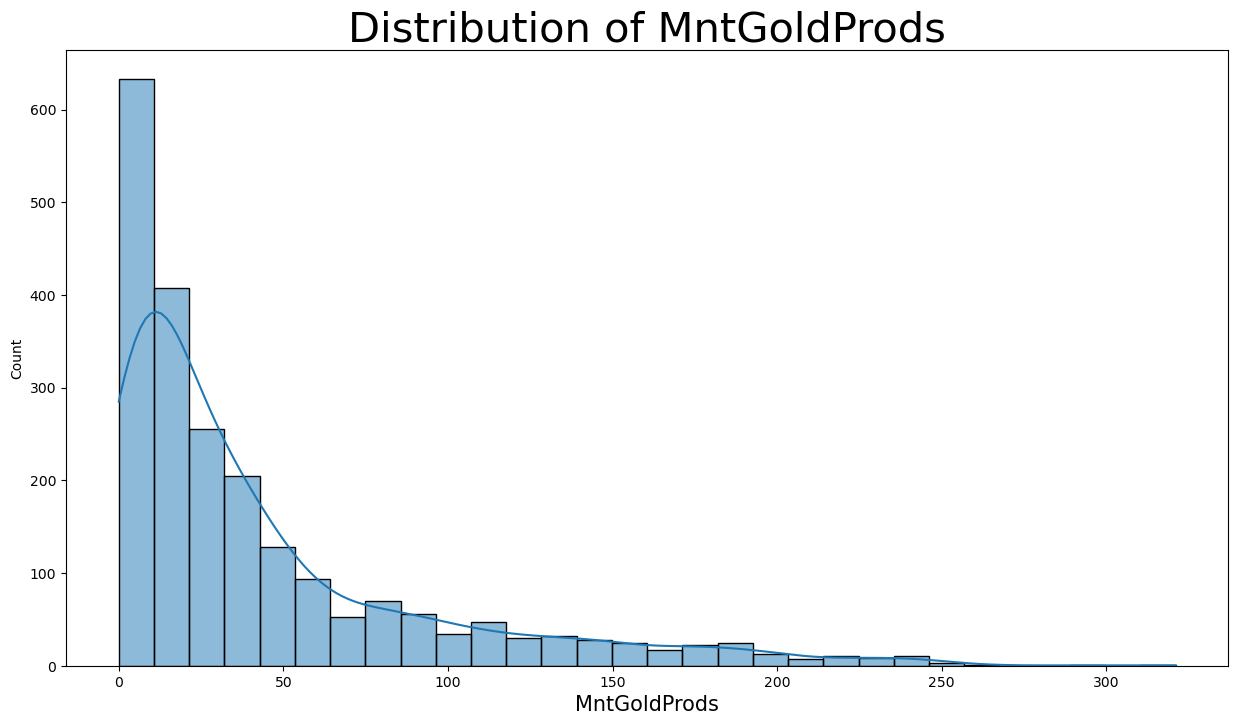

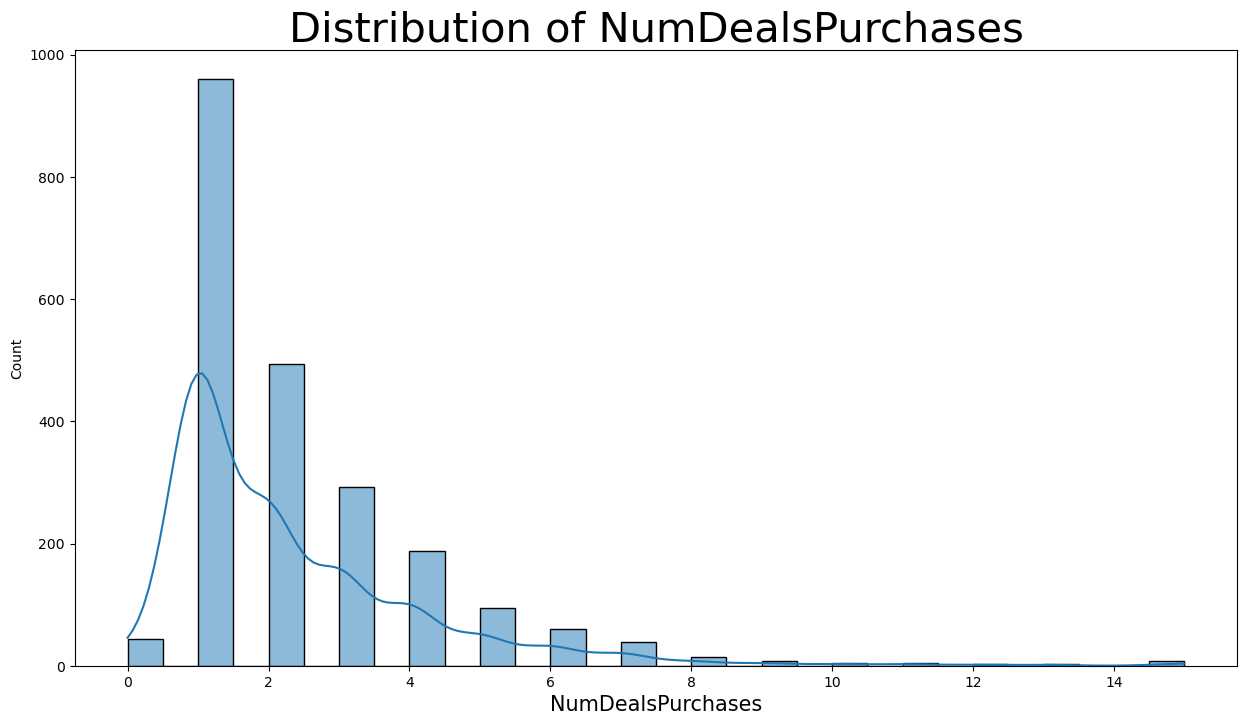

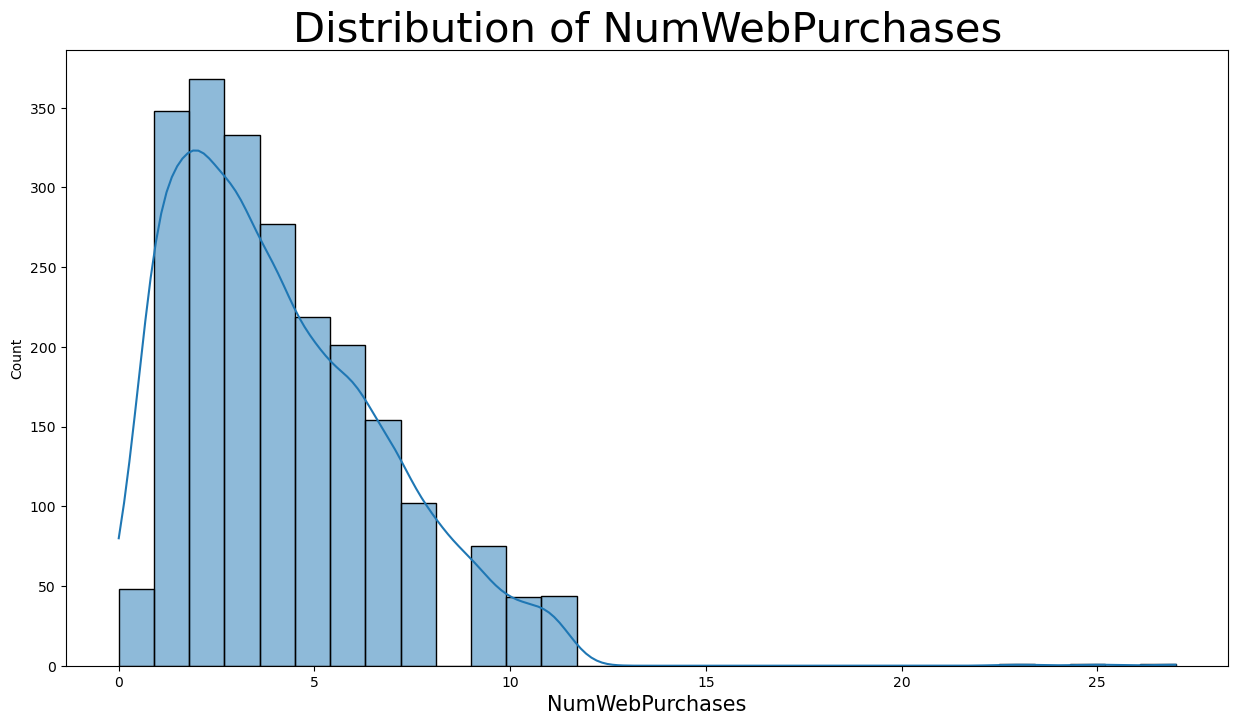

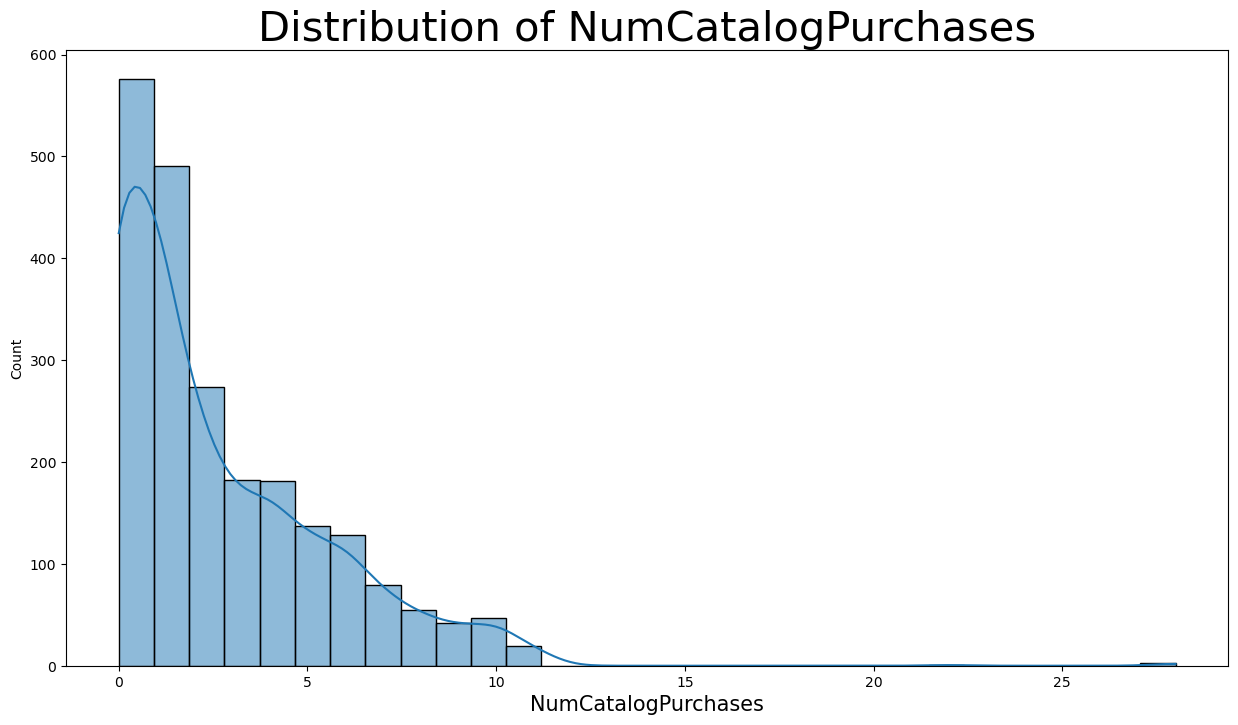

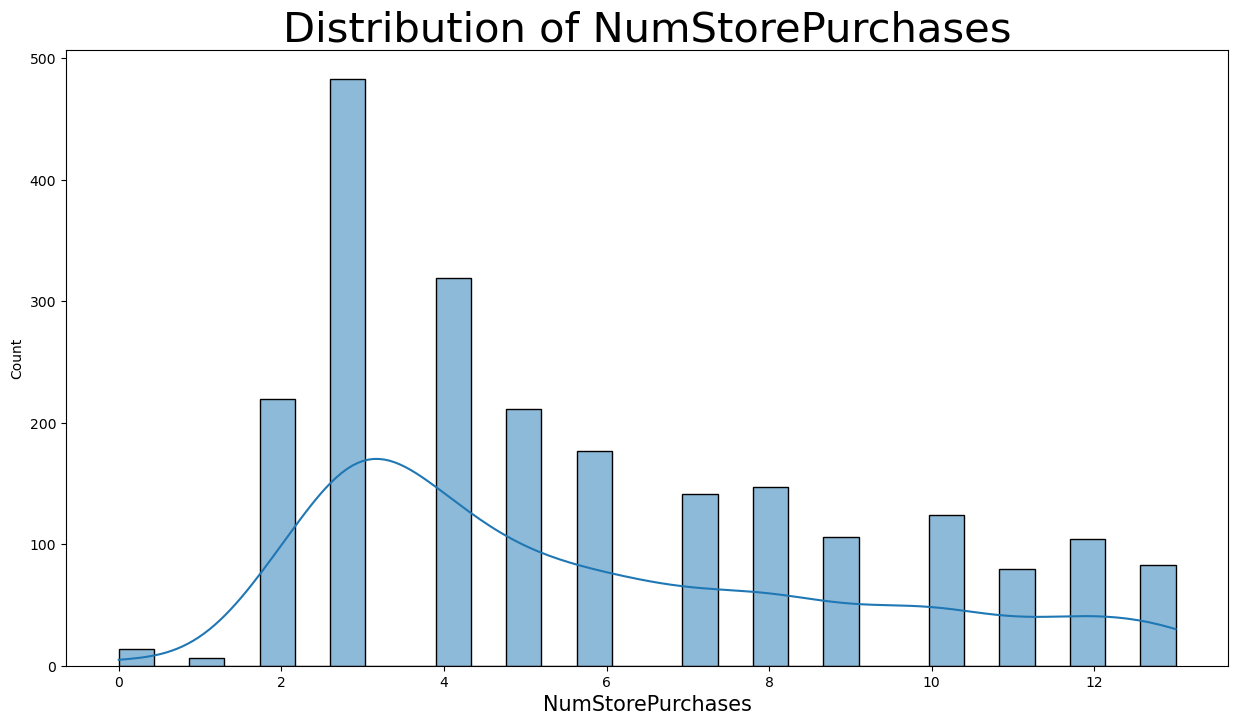

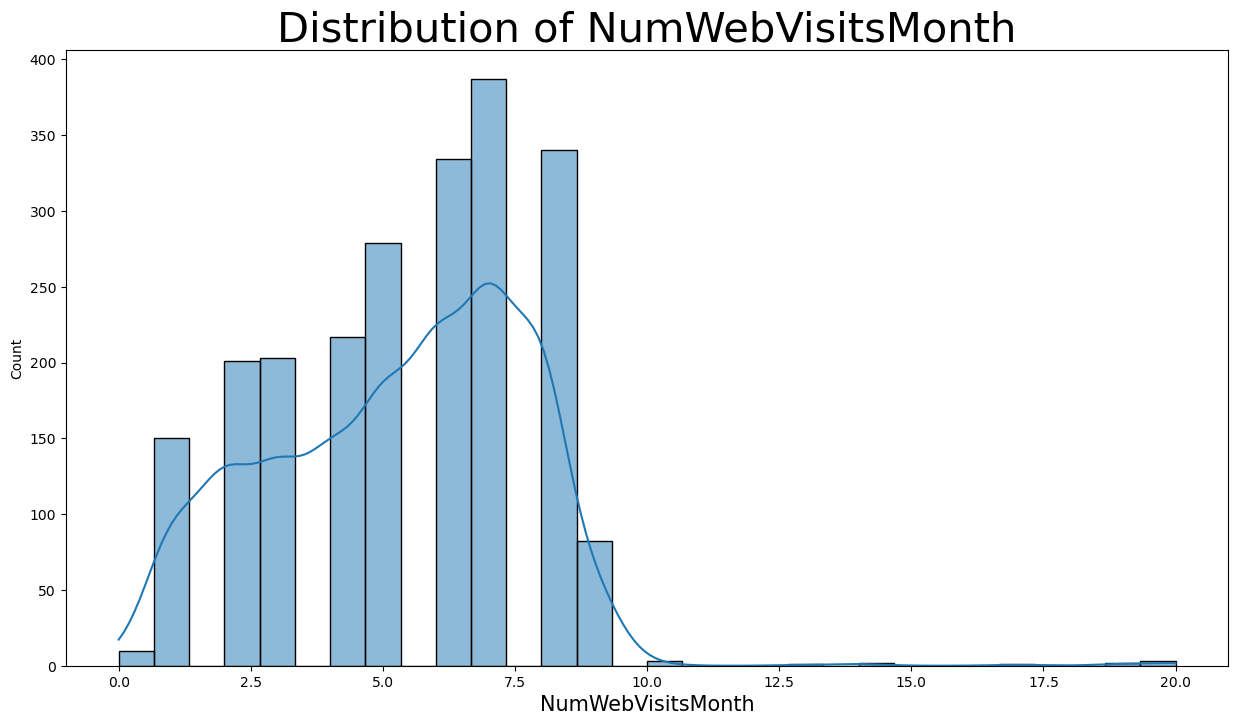

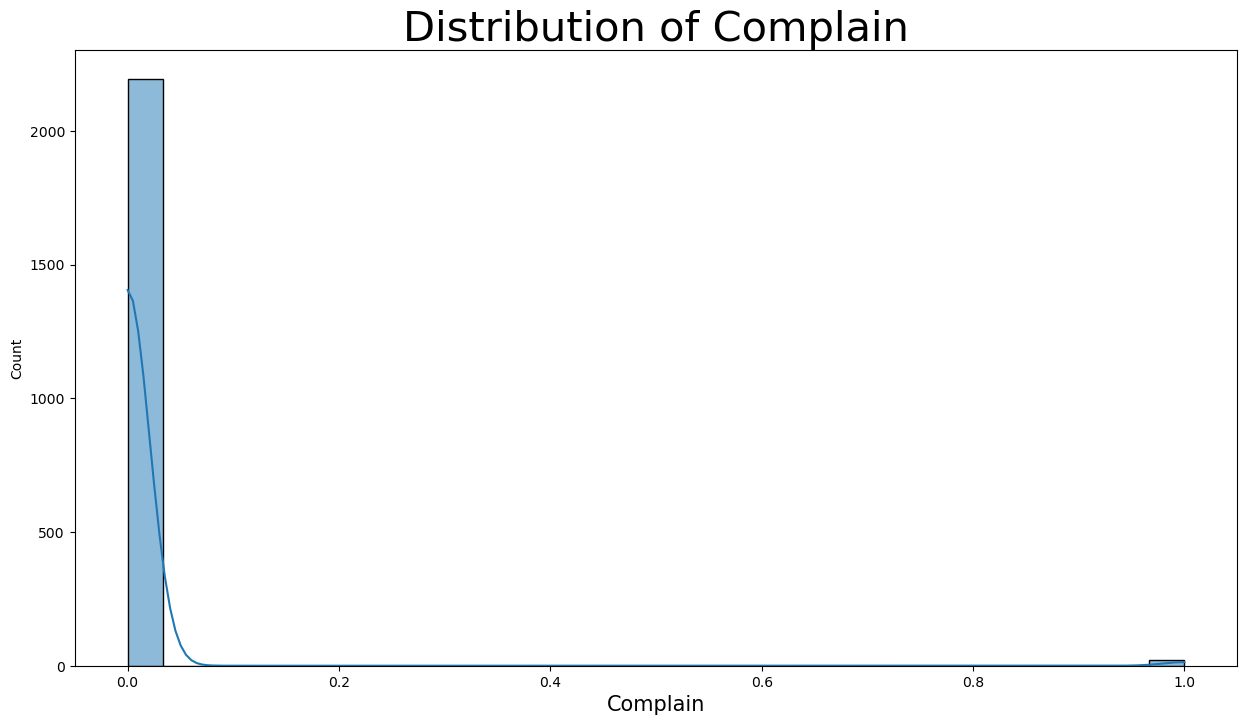

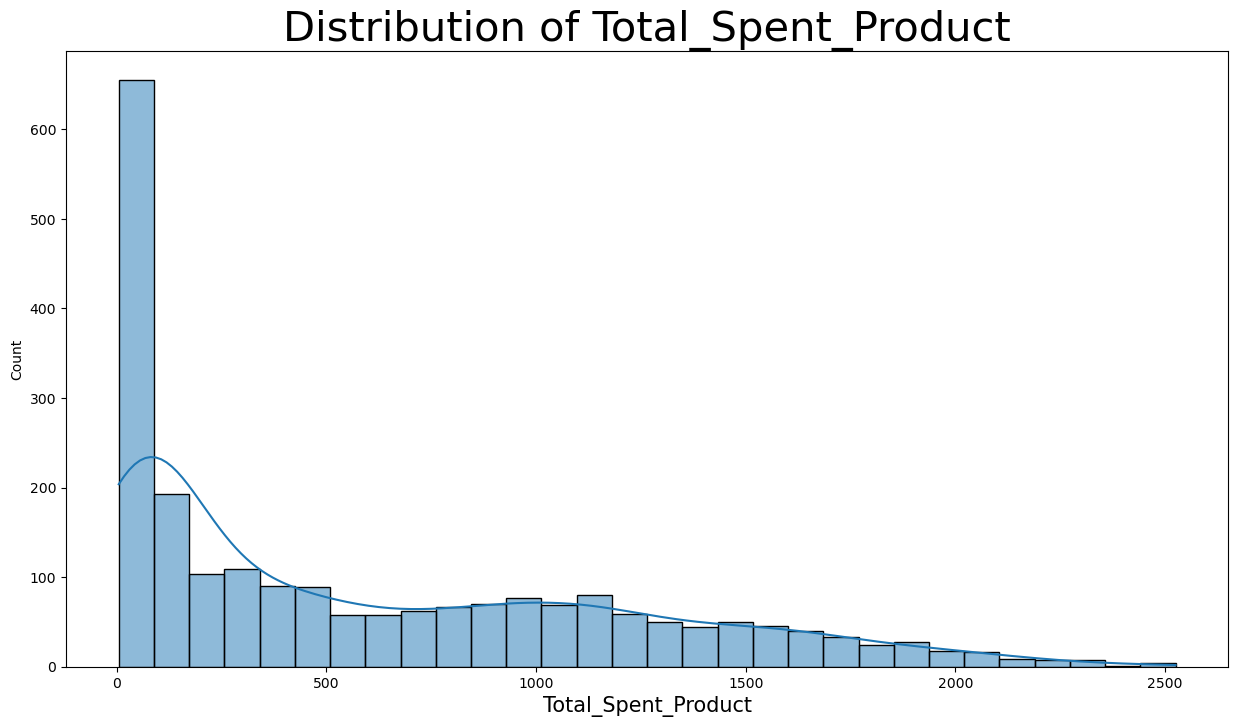

In [203]:
# list of columns to loop through
columns = ['Income', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
           'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Total_Spent_Product']

# loop through columns and create histogram
for col in columns:
    plt.figure(figsize=(15, 8))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}', size=30)
    plt.xlabel(col, size=15)
    plt.show()

The following is an explanation of the data distribution displayed are:
* From the histplot above, it can be seen that the Income distribution has a positive skewness or slopes to the right. This means that most of the data converges on the left of the graph (low income), but there are some extreme values (outliers) on the right (high income). The histogram shows that most of the income data points are collected around values below 100,000, where the data is relatively normal BUT there are several data points with very high income so we can indicate the data is not normally distributed.(will do normality test)
* Most customers are in the Maturity group.
* There are several type of Marital_Status.
* A low number of complaints from consumers suggests either a high degree of customer satisfaction or a lack of ability customer to complain.
* In MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds and others it appears that the data is not normally distributed. Most of the data is clustered on the left, indicating that the majority of values are in the low value range. The data distribution also shows positive skewness, which means the tail of the distribution is on the right side. This shows that a small portion of the customer population has very high frequency.

In [205]:
# Normality Test for Income Feature

from scipy.stats import shapiro

norm, pval = shapiro(df['Income'])

if pval < 0.05 :
    print (f'Reject H0 Due to p-Value ({pval} < 5%)')
    print ('DATA IS NOT NORMALLY DISTRIBUTED')
else :
    print (f'Accept H0 Due to P-Value ({pval} > 5%)')
    print ('DATA IS NORMALLY DISTRIBUTED')

Reject H0 Due to p-Value (3.512706740231336e-19 < 5%)
DATA IS NOT NORMALLY DISTRIBUTED


### 3.2. ANALYSIS BIVARIATE

Next we will explore the relationships between various variables. In this case there are several questions:<br>
     1. What is the relationship between age and Income<br>
     2. What is the relationship between Income and Expenditures?

### What is the relationship between age and Income?<br>
The link between `Age` (x-axis) and `Income` (y-axis) is depicted in the scatter plot above. Most of the data is focussed on 20 to 60 year olds with Income ranging from 40000 to 70000.
Nevertheless, from this scatter plot, there is no clear pattern or correlation between `Age` and `Income`. Put otherwise, the evidence suggests that age is not a significant factor influencing income. The data points are considerably dispersed, yet regardless of age, the majority of people earn in the same range.

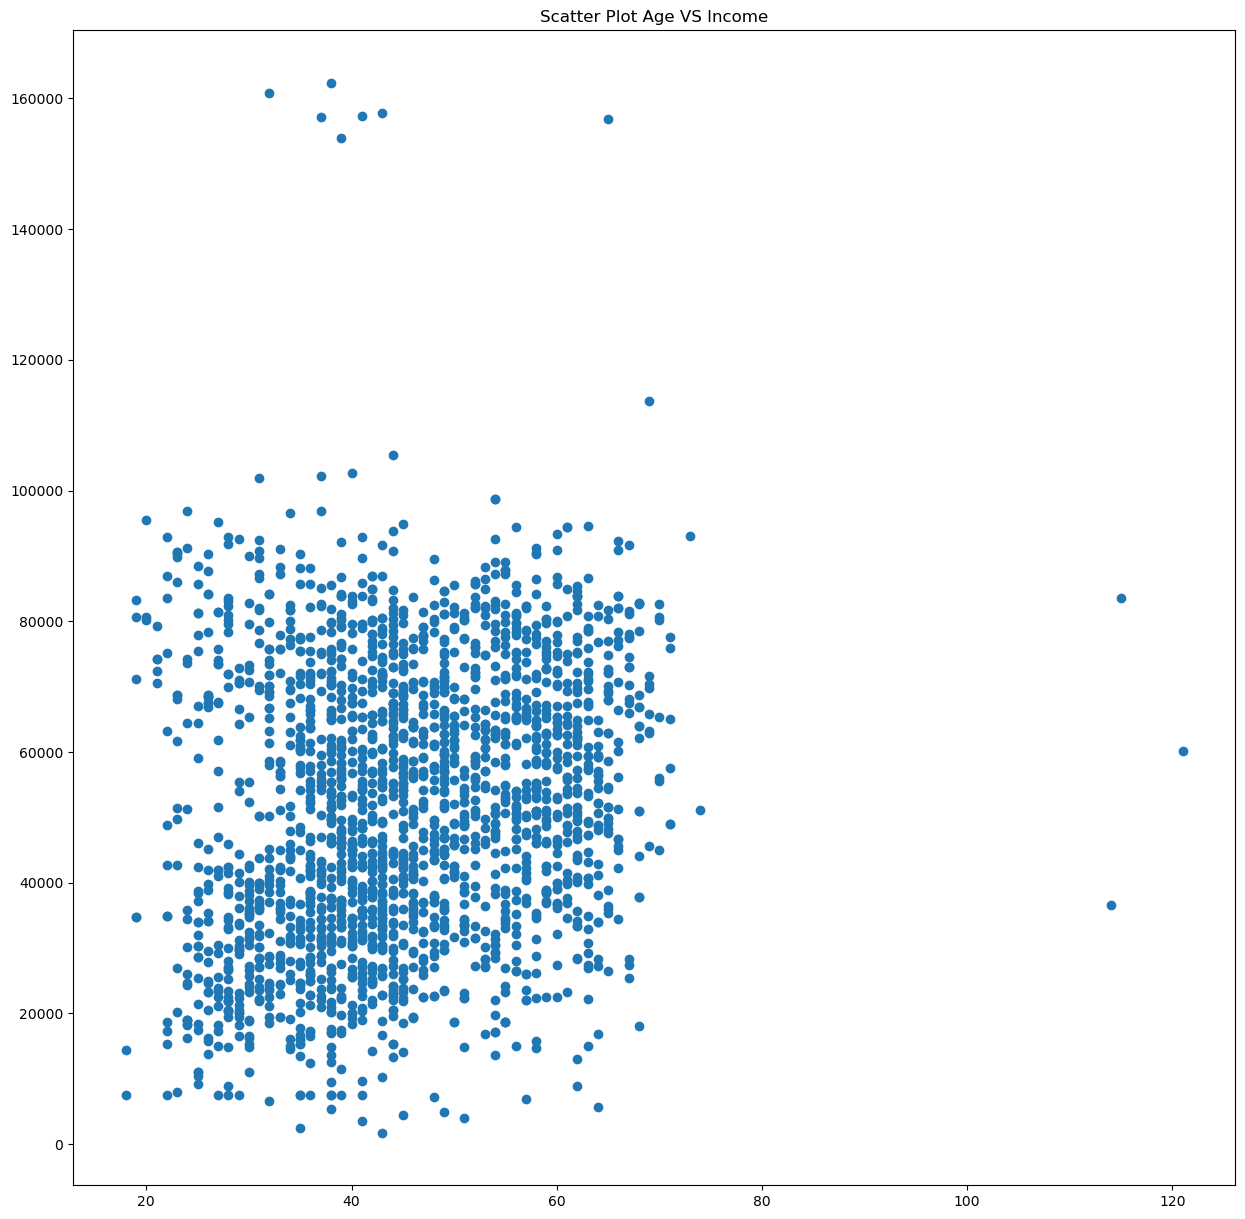

In [151]:
plt.figure(figsize=(15, 15))
plt.scatter(df['Age'], df['Income'])
plt.title('Scatter Plot Age VS Income')
plt.show()

### What is the relationship between Income and Expenditures?
The scatter plot demonstrates a positive correlation between the two variables, indicating that as Income rises, so does the overall amount spent on products.<br>
At lower to medium income levels, there is a greater concentration of data. This suggests that compared to people with higher incomes, those with low to medium incomes typically spend more on products.<br>
When Income rises, so does the overall amount spent on products, although at a slower rate than for those with lower incomes. This may imply that those with more incomes have more options when it comes to how they spend their money.

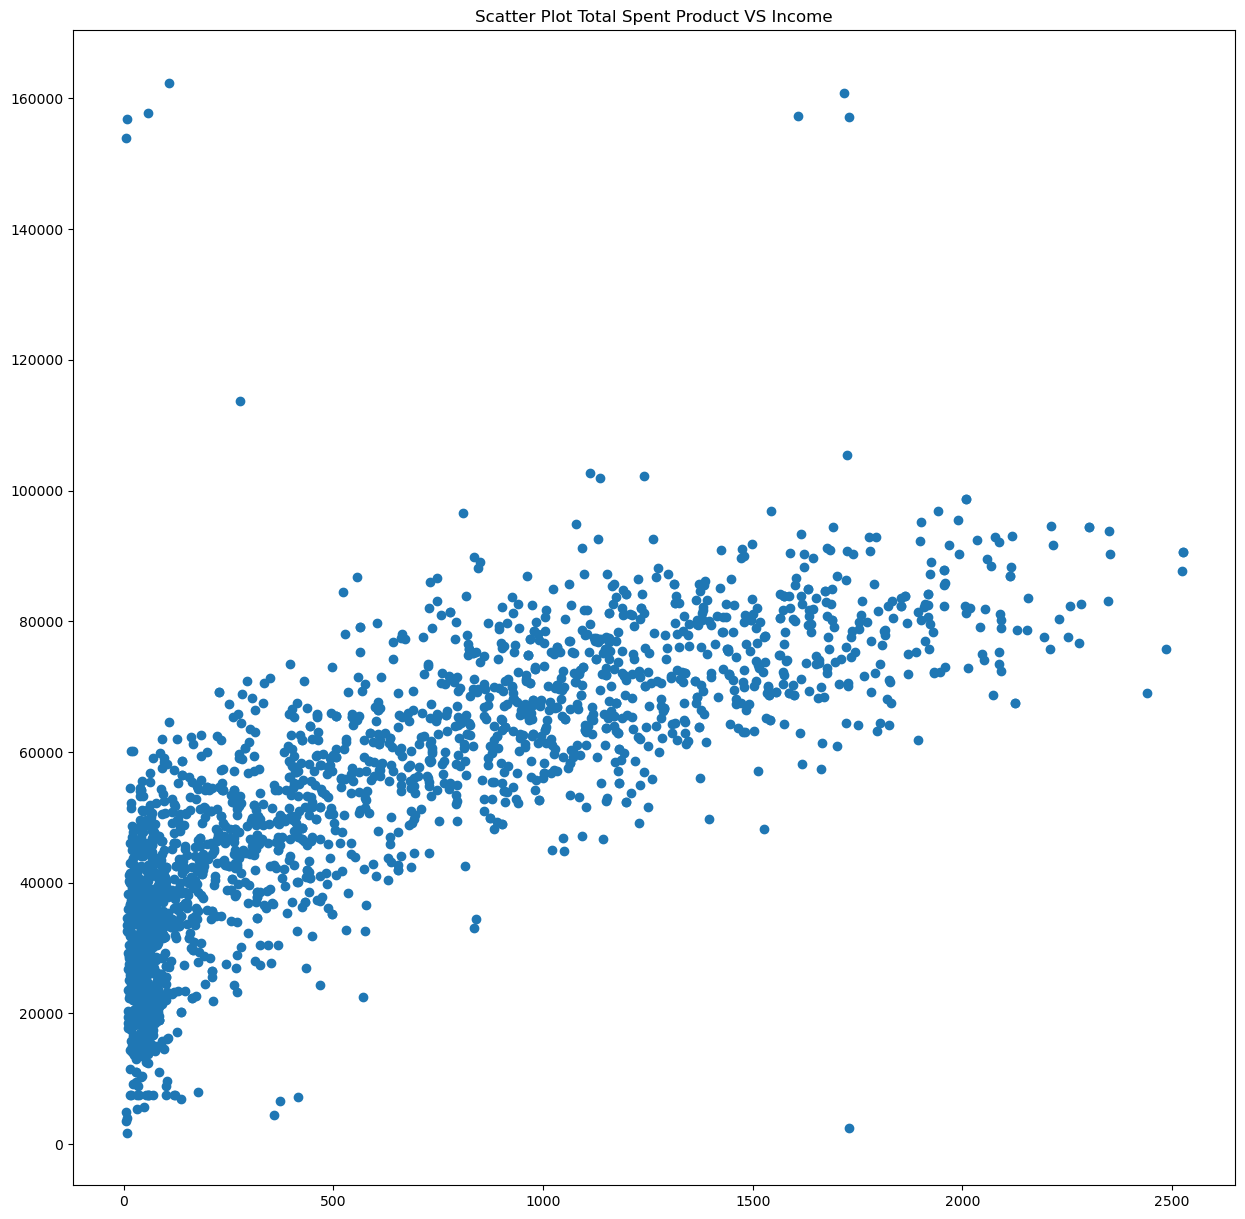

In [114]:
plt.figure(figsize=(15, 15))
plt.scatter(df['Total_Spent_Product'], df['Income'])
plt.title('Scatter Plot Total Spent Product VS Income')
plt.show()

### 3.3. CORRELATION MATRIX
A correlation matrix is a table showing correlation coefficients between sets of variables or to used to evaluate the relationship between two or more variables in a dataset. It's a table where each cell contains a correlation coefficient, which ranges from -1 to 1. Here's what these values mean:<br>
* -1 indicates a perfectly negative linear correlation between two variables.
* 0 indicates no linear correlation between two variables.
* 1 indicates a perfectly positive linear correlation between two variables

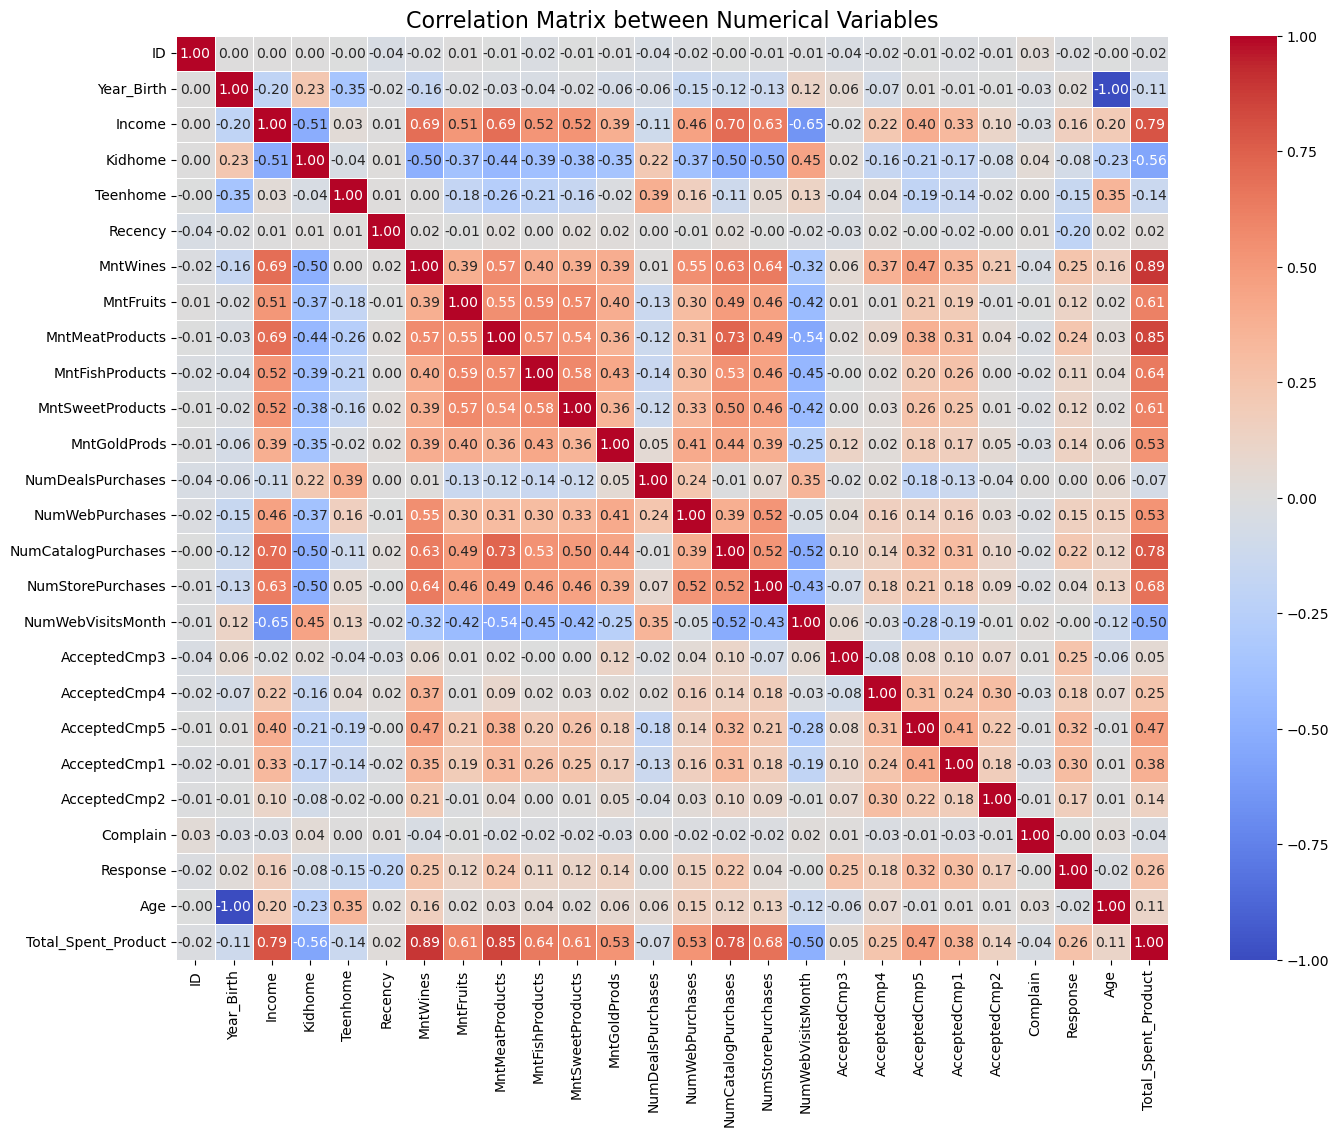

In [122]:
# Only shown for numeric feature
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix between Numerical Variables', fontsize=16)
plt.show()


The correlation matrix table to show are the variables 'Year_Birth, 'Income', 'Kidhome', 'Teenhome', and others. For example, if the correlation between 'MntWines' and 'Total_Spent_Product' is close to 1, it means they're strongly positively correlated. This could imply that customers who spend more on wines also tend to have a higher total spending on products.<br>
Moreover, correlation matrices are often visualized as heatmaps, where colors range from deep blue (indicating -1 or strong negative correlation) through white (indicating zero or no correlation) to deep red (indicating 1 or strong positive correlation). This makes it easier to identify patterns and make data-driven decisions.
It's important to note that correlation does not imply causation. While two variables might be correlated, it doesn’t necessarily mean that one causes the other. Other factors might be at play, or it could be a coincidence.<br>
* It seems that there is a strong positive correlation between the variables 'MntWines' and 'Total_Spent_Product'. This is indicated by the dark red color in the cell where these two variables intersect.<br>
* A positive correlation means that as one variable increases, the other variable also tends to increase. In this case, it suggests that customers who spend more on wines (MntWines) also tend to have a higher total spending on products (Total_Spent_Product).<br>
* Total_Spent_Product Customers' spending on various product categories generally shows a strong positive association. This indicates a tendency for customers to spend more on other categories when they prefer to spend more on one area.<br>
* Income and Age only have 0.2 matrix correlation. There is not a significant correlation between income and age, suggesting that variables other than age may affect a customer's income.
* There is a positive correlation between Total Spent Product and NumWebPurchases, NumCatalogPurchases, NumStorePurchases with NumStoreurchases experiencing the highest positive-correlation.

## BUSINESS QUESTION TO ANSWER

### Q1: What are the different segments of customers that shop at the supermarket? 

#### 1. Customer Segmentation based on Age Classification

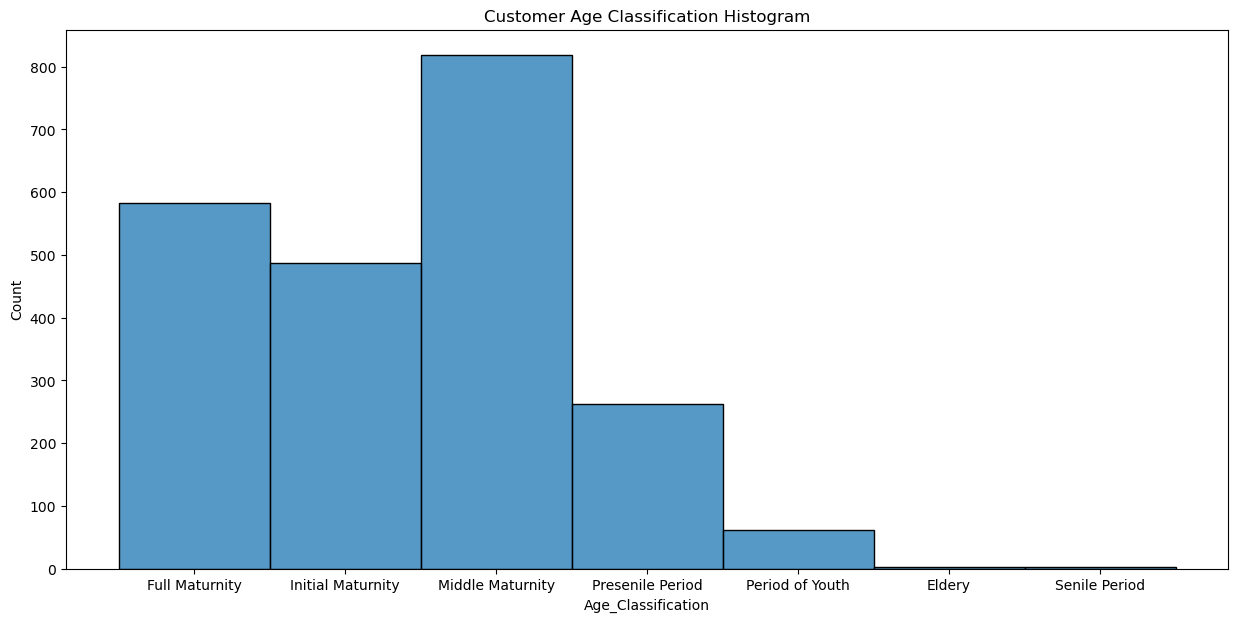

In [125]:
plt.figure(figsize=(15,7))
sns.histplot(df['Age_Classification'], bins=10)
plt.title("Customer Age Classification Histogram")
plt.savefig("Hist_Age.png")
plt.show()

Analysis:
* The 'Middle Maturity' (37-48) Age_Classsification has the highest number of customer.
* The 'Maturnity' (25-60) category occupies the top 3 customers at Dago Supermarket.
* The 'Senile Period' & 'Eldery' (>73) category has the lowest number of customers.

Insights:<br>
* This business is popular among middle-aged and elderly adults, but less attractive to the younger generation.



Solution:
* Develop targeted marketing strategies to attract young customers, such as special offers or products tailored to their tastes.
* Examine current market trends in order to comprehend younger generations' wants or needs and preferences.

In [132]:
df[['Age_Classification', 'Total_Spent_Product']].groupby('Age_Classification').mean()

,Total_Spent_Product
Age_Classification,
Eldery,646.666667
Full Maturnity,686.285223
Initial Maturnity,513.061602
Middle Maturnity,546.798289
Period of Youth,810.573770
Presenile Period,744.259542
Senile Period,1138.000000


But when it comes to Total_Spent_Product, Senile spends more on products. It indicates that seniors rarely shop but when they shop, they spend more on expensive products such as Wines and Meat. (this will be analyze in the future)

#### 2. Customer Segmentation based on Education

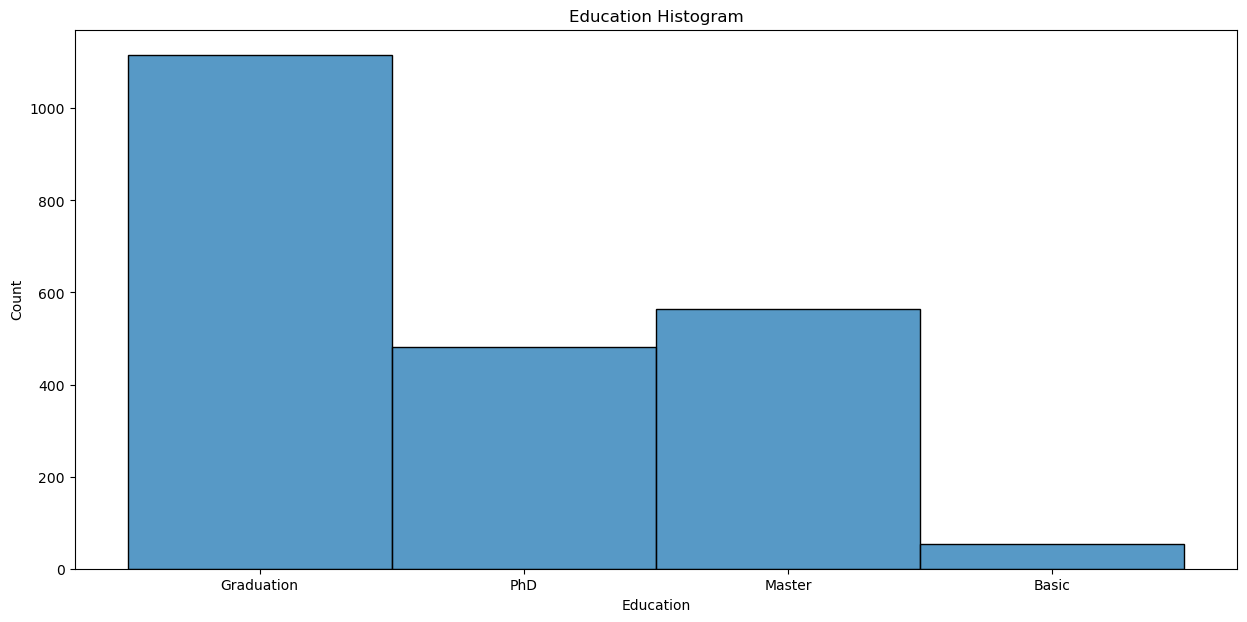

In [148]:
plt.figure(figsize=(15,7))
sns.histplot(df['Education'], bins=10)
plt.title("Education Histogram")
plt.savefig("Hist_Edu.png")
plt.show()

Analysis:
*  With a maximum count of 1000, the 'Graduation' category has the highest frequency.
* The count in the 'Master' category is moderate, ranging from 400 to 600.
* The 'Basic' categories have the lowest frequency.

Insights:
* There is a significant number of individuals who have graduated, indicating a large pool of educated individuals.
* The number of individuals with a Master’s degree is less than those with a Graduation, but more than those with a PhD or Basic education.

Solutions:
* Loyalty Programs: Implement a loyalty program that rewards frequent shoppers with discounts or special offers. This can encourage customers to shop more frequently.
* Educational Discounts: Since a significant number of your customers are graduates or have higher education, offering educational discounts could attract more customers from these groups.
* Diverse Product Range: Ensure that your product range appeals to a wide variety of customers. This could involve stocking more premium products to attract customers with higher education and more disposable income.
* Community Engagement: Engage with the local community through events, sponsorships, or partnerships. This can help to build a positive brand image and attract more customers.

### Q2. Which products are often bought together and best-seller?

#### 1. Best-Seller products

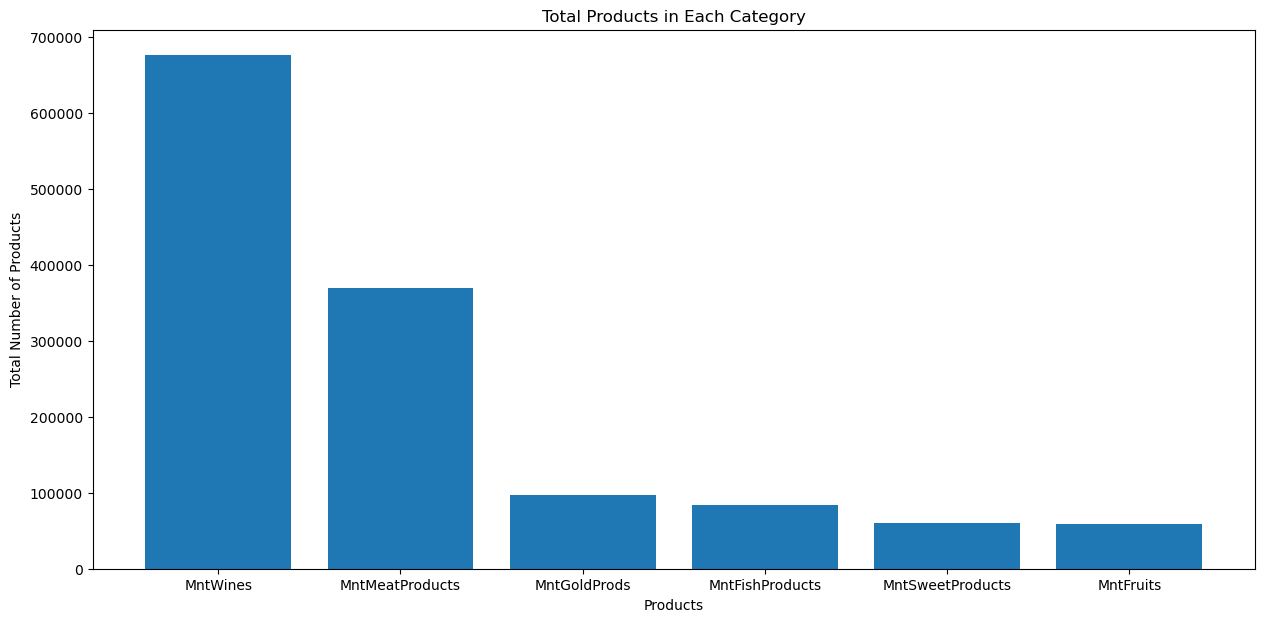

In [144]:
total_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=False)

# Membuat histogram
plt.figure(figsize=(15, 7))
plt.bar(total_per_product.index, total_per_product)
plt.xlabel('Products')
plt.ylabel('Total Number of Products')
plt.title('Total Products in Each Category')
plt.show()

Analysis:
* The 'MntWines' category has the highest count, reaching close to 700000.
* The 'MntMeatProducts' category has a moderate count, around 300000-400000.
* The 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', and 'MntFruits' categories have significantly lower counts.

Insights:<br>
* There is a significant disparity between the product categories, with wines and meats being dominant.
* Other categories may be neglected or underrepresented.
* Wines and meats might be more prominently displayed or advertised in the store, leading to higher sales. Other products might not be as visible or well-promoted, leading to them being overlooked by customers.

Solutions:
* Diversify Product Range: Increase the variety of products in underrepresented categories. This could attract customers who are looking for these items and increase their sales.
* Improve Product Visibility: Make sure that all product categories are easily visible and well-promoted in the store. This could involve rearranging the store layout or improving signage.
* Targeted Marketing: Run marketing campaigns that specifically promote the underrepresented categories. This could involve discounts, special offers, or events related to these products.
* Customer Research: Conduct surveys or collect customer feedback to understand their preferences. If certain products are not selling well, try to find out why and what could make them more appealing.
* Competitive Pricing: Ensure that the pricing of all products is competitive and offers good value for money. This could encourage customers to try different products.
* Staff Training: Train staff to have good knowledge of all product categories so they can provide recommendations and help customers discover new products.

#### 1.1. Best-Seller Product by Age_Classification

In [159]:
total_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

mean_total_per_product = df[['Age_Classification', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby(['Age_Classification']).mean()
mean_total_per_product

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age_Classification,,,,,,
Eldery,259.333333,50.000000,191.666667,39.333333,22.666667,83.666667
Full Maturnity,364.567010,28.560137,175.121993,40.996564,29.018900,48.020619
Initial Maturnity,224.546201,26.681725,158.199179,36.741273,27.098563,39.794661
Middle Maturnity,280.171149,23.086797,146.701711,32.775061,24.176039,39.887531
Period of Youth,333.098361,38.688525,291.016393,53.196721,35.426230,59.147541
Presenile Period,392.503817,28.007634,198.583969,43.572519,29.786260,51.805344
Senile Period,714.500000,21.000000,361.500000,27.500000,0.000000,13.500000


The table above answers the previous question regarding why the 'Senile Period' is spent the most on products even though this category rarely shop. This is because the 'Senile Period' spends more on 'Wine' and 'Meat' products which are more expensive than other products.

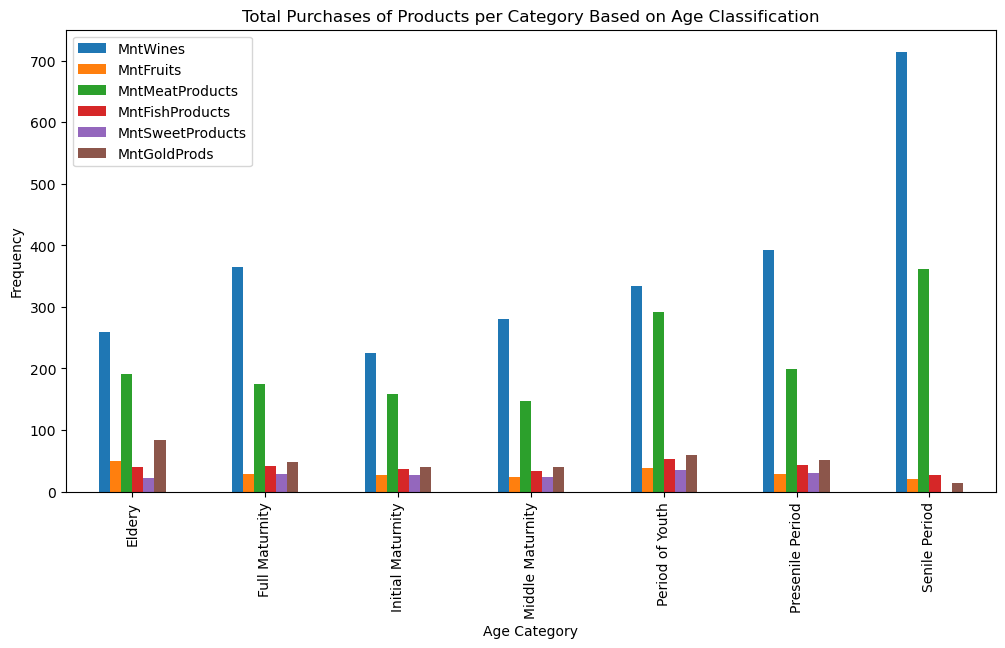

In [170]:
total_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
total_per_product = total_per_product.sum()

# mean total product by age classification
mean_total_per_product = df[['Age_Classification', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby(['Age_Classification']).mean()

# Bar chart display
mean_total_per_product.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.title('Total Purchases of Products per Category Based on Age Classification')
plt.show()

The age categories are represented by the x-axis, which also includes "Period of Youth", "Initial Maturity", "Middle Maturity", "Full Maturity", "Presenile Period", "Senile Period", and "Elderly". <br>
The total amount of purchases made in each category is shown on the y-axis. Wines are represented by the color blue, fruits by the color orange, meat goods by the color green, fish items by the color red, sweet products by the color purple, and gold products by the color brown.<br>
We can see from the graph that:<br>
* All age groups purchase wine consistently as top product<br>
* Purchasing of gold products shows a notable uptick during the senior years.<br>
* All ages have comparatively  consistent but lower purchasing rates for other product categories.
In summary, the graph shows that, with the exception of preteens, wine is a common purchase for most age groups. 

Insight & Solution:
* Generational Marketing: This involves creating unique marketing strategies for each generational age group. For example, Baby Boomers and Millennials respond differently to ads due to their different mindsets and value systems. Understanding these differences can help in crafting effective marketing strategies.
* Product Placement: Position products strategically based on the age group's preferences. For instance, place wines prominently in stores or online platforms for all age groups except preteens. Similarly, highlight gold products for the senior age group.
* Special Offers: Introduce special offers or discounts on products that are popular among certain age groups. This could incentivize purchases and attract more customers.
* Customer Retention: Focus on retaining customers by adding value to their shopping experience. This could be through excellent customer service, loyalty programs, or personalized shopping experiences.

#### 1.2. Best-Seller Product by Education
Same with the Age_Classification, but we change the axis x with 'Education' to see the impact of Education towards purchases

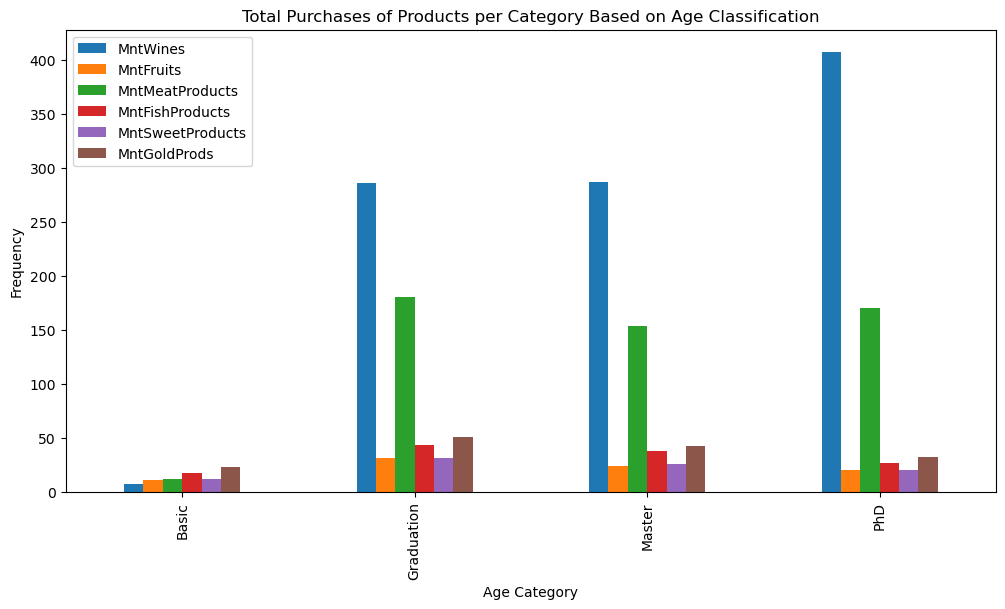

In [181]:
total_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
total_per_product = total_per_product.sum()

mean_total_per_product = df[['Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby(['Education']).mean()

mean_total_per_product.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.title('Total Purchases of Products per Category Based on Age Classification')
plt.show()

In [180]:
total_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
mean_total_per_product = df[['Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby(['Education']).mean()
mean_total_per_product

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
Graduation,285.293274,30.876233,180.539013,43.448430,31.313004,50.718386
Master,286.207080,24.201770,153.065487,37.350442,25.734513,42.557522
PhD,407.222453,20.145530,169.738046,26.877339,20.347193,32.403326


Analysis:

* Individuals with a PhD tend to purchase wines significantly more than any other product or any other age group.
* Only graduationn category that have small amount of wine purchases.
* Meat products are popular among individuals with a Graduation's degree.
* Basic have a balanced purchase pattern but lean towards fruits and wines.

#### 2. Products are often bought together
From the heatmap correlation matrix before, we can infer the relationships between different product purchases. A stronger positive correlation (indicated by a darker red color) between two variables suggests that those products are often purchased together. Conversely, a stronger negative correlation (indicated by a darker blue color) suggests that those products are less likely to be purchased together.
* Fruit & Fish (0.59): This positive correlation suggests that customers who buy fruits are also likely to buy fish products. This could be due to dietary preferences or lifestyle choices.
* Wine & Meat (0.57): This positive correlation suggests that customers who purchase wine also tend to purchase meat products. This could be because wine and meat are often paired together in meals.
* Fish & Meat (0.57): This positive correlation indicates that customers who purchase fish products also tend to purchase meat products. This might be because these customers enjoy a protein-rich diet.

Insights & Solutions:<br>
We can take advantage of the positive correlation between the two products by bundling sales of the two products to increase the number of sales

### Q3. Why do customers prefer in-store shopping and how can their online and catalog shopping experience be enhanced?

#### 1. Percentage of Buying Method Purchases Made by Customers 

Total web purchases: 9050
Total catalog purchases: 5918
Total store purchases: 12852


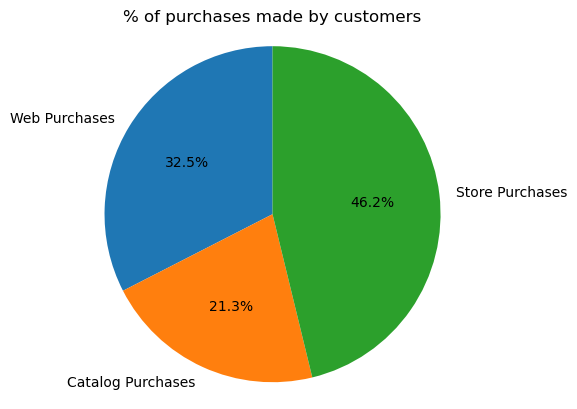

In [177]:
# Calculates total purchases via web, catalog and stores
total_web_purchases = df['NumWebPurchases'].sum()
total_catalog_purchases = df['NumCatalogPurchases'].sum()
total_store_purchases = df['NumStorePurchases'].sum()
print(f"Total web purchases: {total_web_purchases}")
print(f"Total catalog purchases: {total_catalog_purchases}")
print(f"Total store purchases: {total_store_purchases}")

# Percentages
percent_web_purchases = total_web_purchases / (total_web_purchases + total_catalog_purchases + total_store_purchases) * 100
percent_catalog_purchases = total_catalog_purchases / (total_web_purchases + total_catalog_purchases + total_store_purchases) * 100
percent_store_purchases = total_store_purchases / (total_web_purchases + total_catalog_purchases + total_store_purchases) * 100

# Pie Chart
labels = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']
sizes = [percent_web_purchases, percent_catalog_purchases, percent_store_purchases]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('% of purchases made by customers')
plt.show()

* Store Purchases (46.2%): Physical stores account for the majority of purchases. This demonstrates that people prefer to use physical stores for their purchases over alternative channels.<br>
* Web Purchases (32.5%): After in-store purchases, online transactions rank second in popularity. There seems to be a preference for purchasing in physical stores even with the increasing popularity of internet shopping.<br>
* Catalogs Purchases (21.3%): This is the lowest percentage. This indicates that, in comparison to the other two ways, this one is less widely used.<br><br>
We can infer from this data that customers generally prefer to shop in physical locations, even though they have the opportunity to shop online or through catalogues. This might be due to a number of things, like the need to physically inspect and feel the products before making a purchase or ingrained, traditional shopping behaviors.

Insight:
* Even though buying in-person still contributes to the majority of sales, web, and catalog shopping is gaining ground. In order to be competitive in a market that is expanding at an accelerating rate, it is imperative that businesses maintain their focus on sales techniques through physical storefronts while simultaneously creating Web and catalog sales strategies.
* Web and Catalog Purchases: Web and catalog purchases have a lot of potential for expansion. Customers may encounter obstacles when using this kind of shopping, such as a lack of confidence, ignorance about online or catalog shopping, or restricted access to technology.


Solution:
* Enhancing in-store Shopping Experience: Supermarkets should concentrate on enhancing the in-store shopping experience in order to boost sales through in-store purchases. This may be accomplished by enhancing the design of the store, providing exclusive deals or discounts, or enhancing customer support.
* Encourage Online and Catalog Purchases: Supermarkets can run instructional efforts to show consumers how to shop online or through catalogs in an effort to boost sales through online and catalog purchases. Additionally, in order to entice more people to shop using this technique, they can provide incentives like discounts or free shipping.
* Supermarkets can gain insight into their customers' tastes and purchasing habits by analyzing their customer data. They can better target the requirements and desires of their customers by modifying their marketing and sales methods in light of this knowledge.

#### 2. Total Purchases of Products per Category Based on Age Classification and Method of Buying

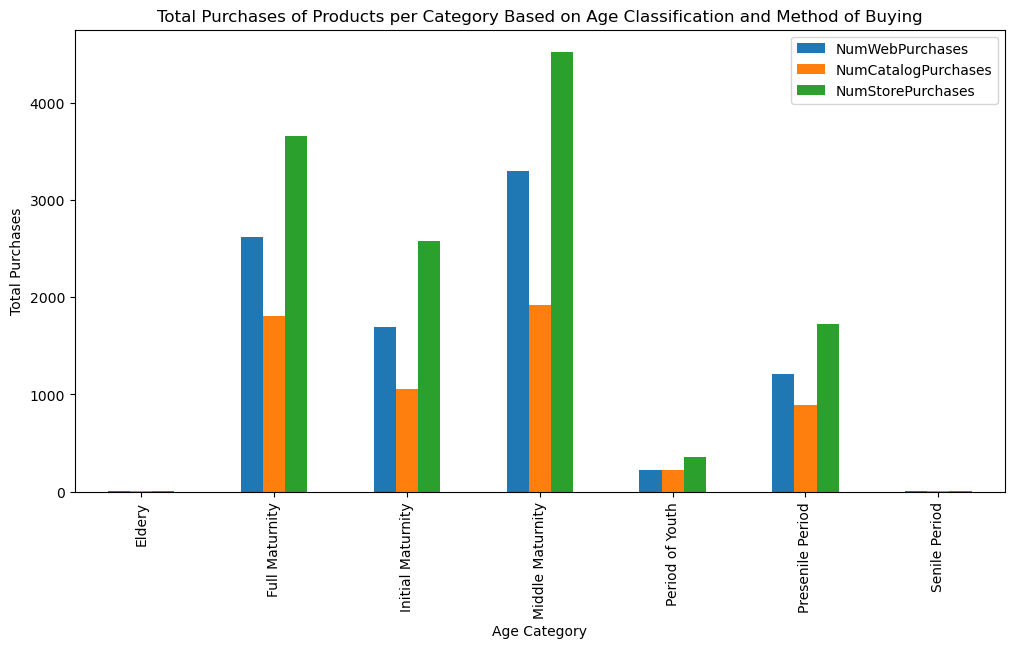

In [171]:
# Group the data by age classification and calculate the sum of purchases for each method
grouped_data = df.groupby('Age_Classification')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Create the histogram
grouped_data.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Age Category')
plt.ylabel('Total Purchases')
plt.title('Total Purchases of Products per Category Based on Age Classification and Method of Buying')
plt.show()

In [178]:
print(f"Total web purchases: {total_web_purchases}")
print(f"Total catalog purchases: {total_catalog_purchases}")
print(f"Total store purchases: {total_store_purchases}")

grouped_data = df.groupby('Age_Classification')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
grouped_data

Total web purchases: 9050
Total catalog purchases: 5918
Total store purchases: 12852


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Age_Classification,,,
Eldery,7,7,8
Full Maturnity,2615,1810,3662
Initial Maturnity,1689,1059,2574
Middle Maturnity,3298,1918,4525
Period of Youth,219,220,351
Presenile Period,1212,893,1723
Senile Period,10,11,9


Insight:
* Web Purchases: Total of 9050, with Full Maturity and Middle Maturity groups having the highest numbers.
* Catalog Purchases: Total of 5918, again with Full Maturity and Middle Maturity leading.
* Store Purchases: Total of 12852, with Middle Maturity having the most significant contribution.
<br>The data shows that the Middle Maturity and Full Maturity age groups are the most active across all purchasing methods. However, the overall trend indicates that in-store purchases are more popular than web or catalog purchases across all age groups.

Solution:
to increase web and catalog sales, consider the following strategies:<br>
* Improve User Experience: Enhance the online and catalog shopping experience to make it as convenient and enjoyable as in-store shopping.
* Targeted Marketing: Implement marketing campaigns that specifically target the Full Maturity and Middle Maturity age groups, as they are the most active customers.
* Personalization: Use personalized recommendations and offers to engage customers more effectively on web and catalog platforms.
* Companies should focus on enhancing their online shopping experience to cater to the majority preference for web purchasing.
* Marketing strategies: can be tailored specifically for each age category to increase sales, especially focusing on digital marketing efforts.

### Q4: How effective is the discount strategy in driving sales and customer satisfaction?

#### 1. Checking Customer Who Applied Campaign

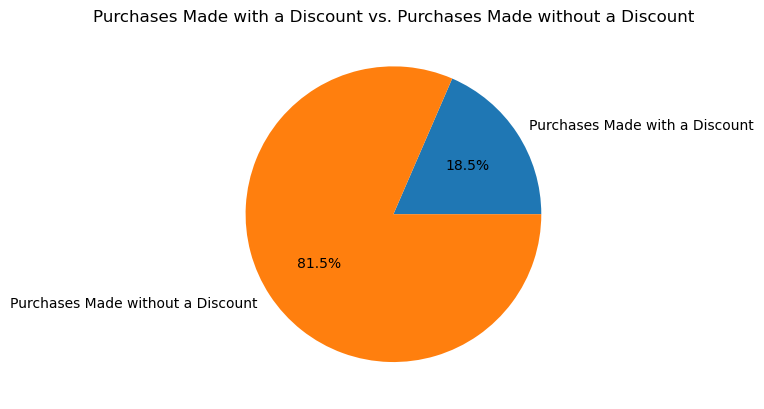

In [189]:
# Calculate the total number of purchases made with a discount
total_deals_purchases = df['NumDealsPurchases'].sum()

# Calculate the total number of purchases
total_purchases = df['NumWebPurchases'].sum() + df['NumCatalogPurchases'].sum() + df['NumStorePurchases'].sum()

# Calculate the number of purchases made without a discount
total_non_deals_purchases = total_purchases - total_deals_purchases

# Create a pie chart for visualization
labels = ['Purchases Made with a Discount', 'Purchases Made without a Discount']
sizes = [total_deals_purchases, total_non_deals_purchases]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Purchases Made with a Discount vs. Purchases Made without a Discount')
plt.show()

Analysis:
* A significant majority of purchases (81.5%) were made without a discount.
* Only a small portion of purchases (18.5%) were made with a discount.
<br> It can say that the Campaign that has released to customer is not effective.

Insight:
* This could indicate that either discounts are not readily available or customers are not aware of them.
* There might be an opportunity to increase sales by offering more discounts or making existing discounts more visible to customers.


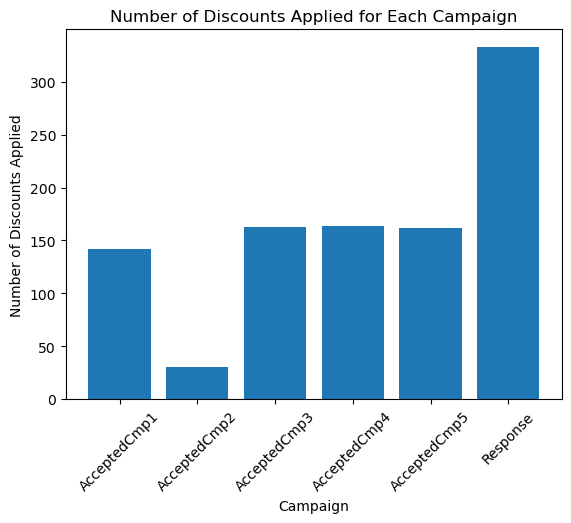

In [192]:
# We will do more analyze which Campaign more success
# List of campaigns
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Initialize a dictionary to store the results
discounts_applied = {}

# Calculate the number of discounts applied for each campaign
for campaign in campaigns:
    discounts_applied[campaign] = df[campaign].sum()

# Create a bar chart for visualization
plt.bar(discounts_applied.keys(), discounts_applied.values())
plt.title('Number of Discounts Applied for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Number of Discounts Applied')
plt.xticks(rotation=45)
plt.show()

Analysis:
* The 'Response' campaign had a significantly higher number of discounts applied, exceeding 300, while all 'AcceptedCmp' campaigns ranged between approximately 50 and 160.
* The 'AcceptedCmp2' are the lowest only 30.

Solutions:
* Since the last campaign gain more applied campaign or more successfull towards other, I suggest Dago Supermarket to use the last campaign.
* Increase the visibility of discounts through marketing campaigns.
* Analyze if the current discounts are attractive enough, and consider revising them if necessary.
* Conduct surveys or collect feedback to understand customer’s awareness and perception towards available discounts.

In [193]:
# Analyze the number of purchases made with a discount
num_deals_purchases = df['NumDealsPurchases'].sum()
print(f'Total number of purchases made with a discount: {num_deals_purchases}')

# Analyze the acceptance of each campaign
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
for campaign in campaigns:
    num_accepted = df[campaign].sum()
    print(f'Number of acceptances in {campaign}: {num_accepted}')

Total number of purchases made with a discount: 5145
Number of acceptances in AcceptedCmp1: 142
Number of acceptances in AcceptedCmp2: 30
Number of acceptances in AcceptedCmp3: 163
Number of acceptances in AcceptedCmp4: 164
Number of acceptances in AcceptedCmp5: 162
Number of acceptances in Response: 333


#### 2. The Number of Discounts Applied for Each campaign and age classification

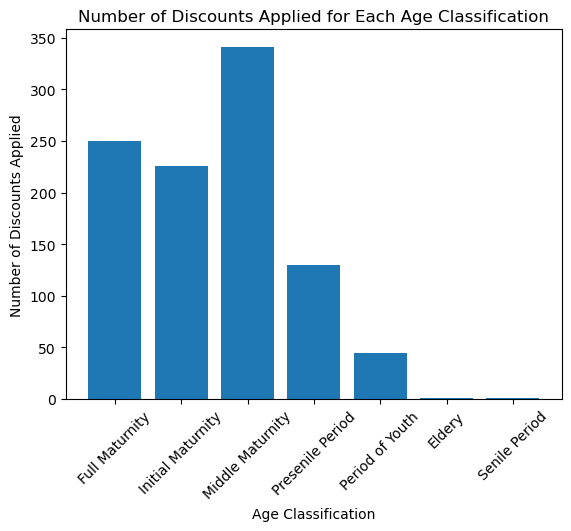

In [194]:
# List of campaigns
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# List of age classifications
age_classifications = df['Age_Classification'].unique()

# Initialize a dictionary to store the results
discounts_applied = {}

# Calculate the number of discounts applied for each campaign and age classification
for age_classification in age_classifications:
    discounts_applied[age_classification] = df[df['Age_Classification'] == age_classification][campaigns].sum().sum()

# Create a histogram for visualization
plt.bar(discounts_applied.keys(), discounts_applied.values())
plt.title('Number of Discounts Applied for Each Age Classification')
plt.xlabel('Age Classification')
plt.ylabel('Number of Discounts Applied')
plt.xticks(rotation=45)
plt.show()

Analysis:
* The 'Middle Maturity' age group applied the highest number of discounts.
* The 'Full Maturity' and 'Initial Maturity' groups also applied a significant number of discounts.
* The 'Pre-senile Period', 'Period of Youth', 'Elderly', and 'Senile Period' groups applied significantly fewer discounts.

Insights:

* This could indicate that Middle Maturnity group is more aware of or able to access discounts.
* The middle maturnity is also have credit card that usually offer discount.
* Younger and older populations are not applied as many discounts.

Solution :
* Targeted Marketing: Develop marketing campaigns that specifically target the age groups that are using fewer discounts. This could involve sending personalized emails or offering deals that are relevant to these age groups.
* Education: Conduct workshops or informational sessions to educate these age groups about the benefits of using discounts and how to access them.
* Partnerships: Partner with credit card companies or other businesses to offer exclusive discounts to these age groups. This could encourage them to use more discounts.
* User-Friendly Platforms: Ensure that your discount application process is user-friendly and accessible to people of all ages. This could involve improving the design of your website or app, or offering assistance to customers who need help applying discounts.
* Feedback: Collect feedback from these age groups to understand why they are not using discounts. This could provide valuable insights that can be used to improve your discount strategy.



#### 3. The Number of Discounts Applied for Each campaign and Education

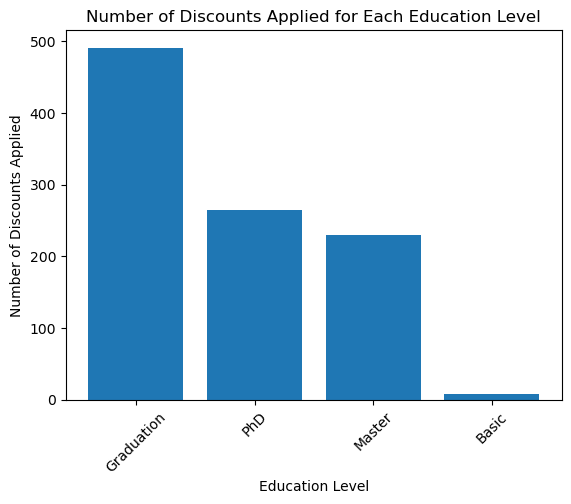

In [197]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# List of education levels
education_levels = df['Education'].unique()

# Initialize a dictionary to store the results
discounts_applied = {}

# Calculate the number of discounts applied for each campaign and education level
for education_level in education_levels:
    discounts_applied[education_level] = df[df['Education'] == education_level][campaigns].sum().sum()

# Create a histogram for visualization
plt.bar(discounts_applied.keys(), discounts_applied.values())
plt.title('Number of Discounts Applied for Each Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Discounts Applied')
plt.xticks(rotation=45)
plt.show()

Analysis:

* Graduates have applied the highest number of discounts.
* Those with a Master’s degree and PhD holders also applied a significant number of discounts.
* Individuals with a basic education level have applied the least number of discounts.

Insights:
* This could indicate that discounts are more accessible or targeted towards individuals with higher education levels.
* There might be an unequal distribution of discount opportunities among different education levels.

Solution:
* Targeted Marketing: Develop marketing campaigns that specifically target the education levels that are using fewer discounts. This could involve sending personalized emails or offering deals that are relevant to these groups.
* Education: Conduct workshops or informational sessions to educate these groups about the benefits of using discounts and how to access them.
* Partnerships: Partner with educational institutions or other businesses to offer exclusive discounts to these groups. This could encourage them to use more discounts.
* User-Friendly Platforms: Ensure that your discount application process is user-friendly and accessible to people of all education levels. This could involve improving the design of your website or app, or offering assistance to customers who need help applying discounts.
* Feedback: Collect feedback from these groups to understand why they are not using discounts. This could provide valuable insights that can be used to improve your discount strategy

### Q5: What is the impact of purchase recency on customer loyalty and satisfaction?

#### 1. Cumulative Recency Over Time

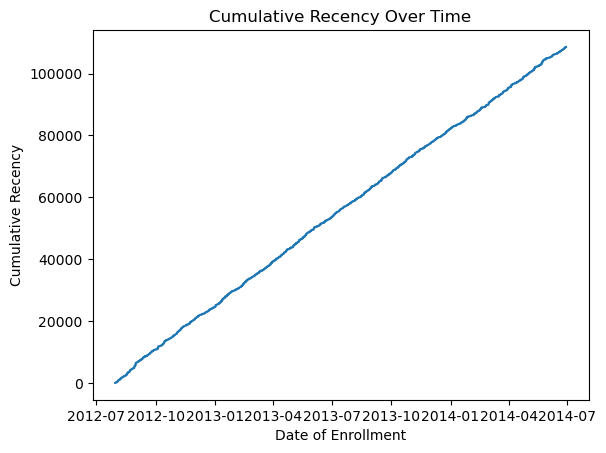

In [198]:
df_sorted = df.sort_values('Dt_Customer')

# Calculate the cumulative sum of Recency
df_sorted['Cumulative_Recency'] = df_sorted['Recency'].cumsum()

# Plot the data
plt.plot(df_sorted['Dt_Customer'], df_sorted['Cumulative_Recency'])
plt.title('Cumulative Recency Over Time')
plt.xlabel('Date of Enrollment')
plt.ylabel('Cumulative Recency')
plt.show()

Analysis:<br>
The graph indicates that the recency of customers’ last purchases has been steadily increasing over time. This could mean that over the period from July 2012 to July 2014, customers have been taking longer to make repeat purchases.

Insight:<br>
This trend could suggest a few things:

* Customers might be taking longer to consume the products, hence the increased time between purchases.
* There could be increased competition leading to customers exploring other options.
* There might be a decrease in customer satisfaction causing customers to delay their next purchase.

Solution:
* Customer Feedback: Conducting surveys or interviews with customers can help you understand why they are slowing down their purchases. Are they dissatisfied with your product or service? Or have they found a better alternative? The answers to these questions can help you formulate a more effective strategy.
* Improve your product or service quality: If a decline in customer satisfaction is the issue, consider improving the quality of your product or service. This could mean making improvements based on customer feedback, or introducing new features that will add value for customers.
* Implement a customer loyalty program: Customer loyalty programs can encourage customers to make repeat purchases. For example, you could offer discounts or free gifts after customers make a certain number of purchases.
* Run regular promotions or sales: Sales or promotions can encourage customers to make purchases more frequently. You could try seasonal sales, or perhaps special offers for customers who haven’t made a purchase in a while.
* Increase your marketing efforts: If competition is the issue, consider increasing your marketing efforts. This could mean doing more advertising, or perhaps introducing your product or service to new markets.

#### 2. The Number of Customers who Complained

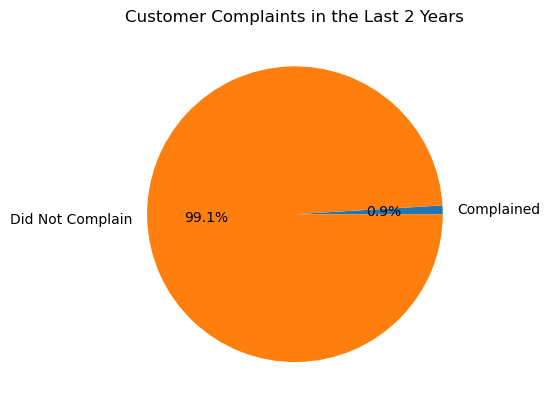

In [199]:
# Calculate the number of customers who complained in the last 2 years
num_complaints = df['Complain'].sum()

# Calculate the total number of customers
total_customers = df['Complain'].count()

# Calculate the number of customers who did not complain
num_no_complaints = total_customers - num_complaints

# Create a pie chart for visualization
labels = ['Complained', 'Did Not Complain']
sizes = [num_complaints, num_no_complaints]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Customer Complaints in the Last 2 Years')
plt.show()

Analysis:
* The chart shows that 99.1% of customers did not complain, while only 0.9% of customers complained.
* The data suggests that the vast majority of customers are satisfied with their experience, as only a small fraction have lodged complaints in the last two years. However, it’s important to note that a low complaint rate doesn’t necessarily mean all customers are happy. Some customers might have chosen not to voice their dissatisfaction.

Insight
* While the low complaint rate is a positive sign, it’s crucial to understand the nature of the complaints made by the 0.9% of customers. These complaints can provide valuable insights into areas that need improvement.

Solution
Here are some strategies to address this:
* Make sure the customer can easily to make a complain. Provide such a form in front of store or online-form in website.
* Analyze Complaints: Understand the issues raised by customers who have complained. Are there common themes or specific products/services that are causing dissatisfaction?
* Customer Feedback: Encourage feedback from all customers, not just those who have lodged complaints. This could be done through surveys or feedback forms. It’s possible that some customers who are dissatisfied are not lodging formal complaints.
* Address Issues: Once you've identified common issues, work on addressing them. This could involve improving products/services, training staff, or changing policies.
* Follow Up: After making changes, follow up with customers who have complained to see if they’re satisfied with the actions taken.

## 4. CONCLUSION

The report shows that wine is a common purchase for most age groups, with individuals with a PhD tending to purchase wine significantly more than any other product or age group. The 'Middle Maturity' age classification has the highest number of customers, and the 'Graduation' category has the highest frequency. The report also highlights the top-selling products and the percentage of buying method purchases made by customers. Overall, the report provides insights into customer behavior and purchasing patterns at Dago Supermarket.

* The Customer Segmentation based on age classification and reveals that the 'Middle Maturity' age group has the highest number of customers, while the 'Senile Period' and 'Elderly' categories have the lowest.
* The customer segmentation based on education and shows that the 'Graduation' category has the highest frequency, while the 'Basic' categories have the lowest.
* The best-selling products at the Dago's Supermarket, with 'Wines' being the most popular category.
* The wine is a common purchase for most age groups, with the exception of preteens.
* Individuals with a PhD tend to purchase wines significantly more than any other product or any other age group.
* The percentage of buying method purchases made by customers and the total purchases of products per category based on age classification and method of buying, respectively. 
*  The data suggests that the vast majority of customers are satisfied with their experience, as only a small fraction have lodged complaints in the last two years. However, it’s important to note that a low complaint rate doesn’t necessarily mean all customers are happy.
* The data also indicates that there has been an increase in recency (Number of days since the customer's last purchase) over the last two years.
* Overall, the report provides insights into customer behavior at Dago Supermarket, including their age, education, and purchasing habits.

To maximize customer engagement, Dago's Supermarket can tailor marketing messages and promotions to specific customer groups based on age and education.
1. Targeted Promotions for Middle Maturity Group:
* Personalized Marketing: Tailor marketing messages to this age group’s preferences.
* Loyalty Programs: Offer rewards for frequent purchases to encourage repeat business.
* Educational Content: Provide useful information about products or services that this age group is interested in.
2. Special Discounts for PhD Customers Who Purchase Wines:
* Discounts on Wine: Offer special discounts on wines for customers with a PhD. This could be a percentage off, a buy one get one free offer, or a flat discount on certain bottles.
* Wine Tasting Events: Organize exclusive wine tasting events for PhD holders. This not only promotes your wine selection but also provides a platform for networking and socializing.
* Wine Club Membership: Create a wine club for PhD customers offering benefits like exclusive access to new and limited-edition wines, special discounts, and invitations to wine-related events.
3. Web-Based Promotions for Full Maturity and Middle Maturity Groups:
* Personalized Email Campaigns: Send personalized emails with special offers or discounts to these groups.
* Social Media Ads: Use targeted ads on social media platforms that these groups frequently use.
* Content Marketing: Share useful content related to products they often purchase.
4. Catalog-Based Promotions for Full Maturity and Middle Maturity Groups:
* Targeted Catalogs: Send catalogs with products and offers tailored to these groups.
* Special Discounts: Include special discounts or coupons that can be redeemed in-store.
* Exclusive Products: Highlight products that are exclusive or new to the store.
5. Store-Based Promotions for Middle Maturity Group:
* In-Store Events: Host events that appeal to this group, such as product demonstrations or tastings.
* Loyalty Programs: Offer a loyalty program with rewards for frequent purchases.
* Point of Sale Promotions: Use point of sale promotions like discounts on next purchase or free product samples.